# Decadal Mean Value Analysis




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymannkendall as mann_kendall
import itertools
from scipy.stats import kendalltau, pearsonr, spearmanr

## Reading Files

In [4]:
dataset = 'camels_GB'

output_version = '1'

path = f'C:/users/creeb/ThesisGit/Thesis_Git_MOH/{dataset}/'

index_file = 'CAMELS_GB_catchment_boundaries_table.xlsx'

fignum = 0  # iusing a cumulative count of fignum is useful

indexes = pd.read_excel(path+index_file)

EE_list = indexes.system_index.to_list()[:659]

catchment_list = indexes.loc[:, 'ID']

index_list = [i for i in zip(EE_list, catchment_list)]

In [6]:
ex_df = pd.read_excel(path + str(index_list[2][0]) +'_decadal.xlsx', index_col=0, parse_dates=True)
ex_df

B1          B2          B3           B4  \
1984-08-31 22:00:00         NaN         NaN         NaN          NaN   
1985-08-31 22:00:00         NaN         NaN         NaN          NaN   
1986-08-31 22:00:00         NaN         NaN         NaN          NaN   
1987-08-31 22:00:00         NaN         NaN         NaN          NaN   
1989-08-31 22:00:00         NaN         NaN         NaN          NaN   
1990-08-31 22:00:00         NaN         NaN         NaN          NaN   
1991-08-31 22:00:00         NaN         NaN         NaN          NaN   
1992-08-31 22:00:00         NaN         NaN         NaN          NaN   
1993-08-31 22:00:00         NaN         NaN         NaN          NaN   
1994-08-31 22:00:00  780.028052  861.785816  757.865537  3061.704213   
1995-08-31 22:00:00  726.495268  819.226926  712.254609  2994.105948   
1997-08-31 22:00:00  723.261015  800.029977  698.177472  2841.385618   
1999-08-31 22:00:00  740.409064  811.918442  710.787793  2832.258818   
2000-08-31 22:00:00  692.193279  756.090775  640.573049  2747.230631   
2001-08-31 22:00:00  693.644771  744.229315  631.517087  2623.078263   
2002-08-31 22:00:00  690.075418  734.363481  628.280424  2643.878036   
2003-08-31 22:00:00  801.204089  838.961819  733.429414  2769.359106   
2004-08-31 22:00:00  495.531689  634.956461  533.313254  2621.575717   
2005-08-31 22:00:00  502.268202  641.740589  536.815423  2612.806246   
2006-08-31 22:00:00  463.410011  607.696783  505.005291  2674.223270   
2007-08-31 22:00:00  474.340714  614.148041  513.830443  2625.189446   
2009-08-31 22:00:00  477.104118  629.782856  528.984784  2717.692267   
2010-08-31 22:00:00  460.031959  609.073142  509.933266  2678.081599   
2011-08-31 22:00:00  463.080961  612.876438  517.575157  2653.240749   
2012-08-31 22:00:00  542.087106  699.318350  609.599545  2819.542128   
2013-08-31 22:00:00  520.360393  678.533614  590.053838  2752.248286   
2014-08-31 22:00:00  360.295382  524.276213  443.118552  2542.660364   
2015-08-31 22:00:00  333.961304  505.193326  419.246230  2498.235067   
2016-08-31 22:00:00  325.229387  495.091678  418.410758  2501.598987   
2017-08-31 22:00:00  328.576916  501.457420  425.481096  2526.374876   
2018-08-31 22:00:00  315.784114  495.495668  423.009370  2578.415205   
2019-08-31 22:00:00  308.898858  489.679709  420.240159  2570.150158   
2020-08-31 22:00:00  305.459656  491.644844  427.213880  2570.092395   
2021-08-31 22:00:00  305.153412  493.753950  427.248659  2622.721103   
2022-08-31 22:00:00  214.890138  412.864738  341.405470  2565.763505   

                              B5          B7      ndvi       evi       nbr  \
1984-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1985-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1986-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1987-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1989-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1990-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1991-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1992-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1993-08-31 22:00:00          NaN         NaN       NaN       NaN       NaN   
1994-08-31 22:00:00  1563.527430  782.259569  0.648532 -0.338359  0.617616   
1995-08-31 22:00:00  1500.344342  744.554625  0.655653 -0.331601  0.626607   
1997-08-31 22:00:00  1424.032472  710.366851  0.654305 -0.338624  0.634530   
1999-08-31 22:00:00  1412.995352  708.030771  0.647200 -0.342340  0.635432   
2000-08-31 22:00:00  1253.694571  603.610910  0.672389 -0.358527  0.667384   
2001-08-31 22:00:00  1195.767344  579.209726  0.664533 -0.364355  0.669083   
2002-08-31 22:00:00  1225.993337  608.021191  0.667539 -0.360036  0.660396   
2003-08-31 22:00:00  1353.353440  704.225390  0.645566 -0.357570  0.641439   
2004-08-31 22:00:00  1257.748663

## Three decadal periods for which parameters are calculated from Water Balance

This is individual for the Meuse basin dataset. Camels GB for example is longer. 

-->1980-1989 --  1990 - 1999 -- 2000-2009

we take the following slices:

--> [ NA ] -- [ 12 ] -- [ 21 ]

In [17]:
  #Read and list the catchment IDs used

keys_list = pd.read_excel(path + str(index_list[0][0]) +'_decadal.xlsx').keys().to_list()   #The Keys used here are the bands and indices from the decadal average table


print(keys_list[1:])   #should print all bands/indices keys within the decadal average table

bracket1, bracket2, bracket3 = '1980 - 1989', '1990 - 1999', '2000 - 2009'
slice1, slice2, slice3 = 1, 12, 21

#fignum+=1
#plt.figure(fignum, figsize=(20,10))

mk_list = []

br_means = []  # the values conforming with the slices defined by the LT water balance effort


for keys in keys_list[1:]:
    fignum+=1
    '''
    Looping through the keys (bands and indices generated from the landsat surface reflectances)
    
    --> inner loop says: for this key, loop through each file and chart the timeseries
    
    charting is slow and commented out, but will overlay all timeseries available if run
    '''
#    plt.figure(fignum, figsize=(20,10))
#    plt.title(keys)
    
    for ind in index_list:
        df = pd.read_excel(path + ind[0] +'_decadal.xlsx', index_col=0, parse_dates=True)
        
        loc = df.loc[:, keys]
        
        br_means.append([ind[0], keys, ind[1], loc[slice1], loc[slice2], loc[slice3], ])
#        x = df.loc[:, keys_list[0]]
#        plt.plot(loc, label=ind[16:])
#        plt.legend(bbox_to_anchor=(1,1),ncol=2, loc="upper left")
        temp_mk_list = list(mann_kendall.original_test(loc))
        temp_mk_list.append(keys)
        temp_mk_list.append(ind[0])
        temp_mk_list.append(ind[1])
        mk_list.append(temp_mk_list)

print('done')

['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'ndvi', 'evi', 'nbr', 'ndmi', 'gndvi', 'ndbi', 'BRIGHTNESS', 'GREENNESS', 'WETNESS']
done


# What to do with these averages? 

* Can we get a table of deltas? e.g. what if the NDVI delta can be used to predict the deviation in the Budyko framework?
* Establish a table of deltas, use fitted slope? 

In [18]:
'''
Creating the spectral average table with matching brakets of dates
'''

headers = [f'system_index', f'band', f'ID', f'{bracket1}', f'{bracket2}', f'{bracket3}']

datatype = {f'system_index': str,
            f'band':str, 
            f'ID':int, 
            f'{bracket1}':float, 
            f'{bracket2}':float, 
            f'{bracket3}':float,}

decadal_df = pd.DataFrame(br_means, columns=headers).astype(datatype)

d_groups = decadal_df.groupby(['band']).groups

GB = pd.read_csv('GB.csv', skipinitialspace=True)

camels_indices = GB.keys().to_list()


In [19]:
WB_indices = ['AI',
              'EI',
              'Ep',
              'HAI',
#              'Epa',
              'P',
#              'Pa',
              'SI',
              'ST',
              'T',
              'is_dur',
              'omega',
              'dp',
              'sp',
              'dt',
              'st',
              'sd',
              'de',
              'se',
              'Sr actual',]

In [20]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]


In [21]:
def combine_decadal_tables(indices:[], keys_list):
    
    '''
    Passing climatic / LT WB indices
    
    generate dataframe with columns: 
    [ "system_index", "catchment_name", "decade_ending", "country_code",  "index_name"]

    '''
    
    key = keys_list[0] 
    
    SR_ndvi = decadal_df.iloc[d_groups[key]]

    df = pd.merge(SR_ndvi, GB, on='ID')
    
    x2 = df.loc[:, f'{bracket2}']
    AI_2 = df.loc[:, 'AI']
    EI_2 = df.loc[:, 'EI']
    SR_2 = df.loc[:, 'Sr']
    Catchment_x2 = df.loc[:, 'ID']
    decade_x2 = [1999 for i in range(len(x2))]
    SID_x2 = df.loc[:, 'system_index']
    country_x2 = ['GB' for i in range(len(x2))]
    
    
    x3 = df.loc[:, f'{bracket3}']
    AI_3 = df.loc[:, 'AI']
    EI_3 = df.loc[:, 'EI']
    SR_3 = df.loc[:, 'Sr']
    SID_x3 = df.loc[:, 'system_index']
    Catchment_x3 = df.loc[:, 'ID']
    decade_x3 = [2009 for i in range(len(x3))]
    country_x3 = ['GB' for i in range(len(x3))]
    
    
    
    SR_index_values = list(itertools.chain(*(x2.to_list(),
                                             x3.to_list(),))) 

    SID = list(itertools.chain(*(SID_x2.to_list(),
                                 SID_x3.to_list(),)))

    country_code = list(itertools.chain(*(country_x2, 
                                          country_x3,)))

    catchment_name = list(itertools.chain(*(Catchment_x2.to_list(),
                                            Catchment_x3.to_list(),)))

    decade_ending = list(itertools.chain(*(decade_x2, 
                                          decade_x3,)))
    
    AI = list(itertools.chain(*(AI_2.to_list(),
                                             AI_3.to_list(),)))
    
    EI = list(itertools.chain(*(EI_2.to_list(),
                                             EI_3.to_list(),)))
    
    SR = list(itertools.chain(*(SR_2.to_list(),
                                             SR_3.to_list(),)))
    
    dict_ = { "system_index":SID, 
             "country_code":country_code,
             "catchment_name":catchment_name, 
             "decade_ending":decade_ending, 
             "LT_AI":AI, 
             "LT_EI":EI, 
             "LT_SR":SR,  
             key:SR_index_values}
    
    dict_dtype = { "system_index":str, 
             "country_code":str,
             "catchment_name":str, 
             "decade_ending":int,
                  "LT_AI":float, 
             "LT_EI":float, 
             "LT_SR":float,  
             key:float}
    
    df_all = pd.DataFrame(dict_).astype(dict_dtype)
    
    for key in keys_list[1:]:
        SR_ndvi = decadal_df.iloc[d_groups[key]]
 
        df = pd.merge(SR_ndvi, GB, on='ID')
        
        x2 = df.loc[:, f'{bracket2}']
        
        x3 = df.loc[:, f'{bracket3}']

        
        SR_index_values = list(itertools.chain(*(x2.to_list(),
                                             x3.to_list(),))) 
        
        df_all[key] = SR_index_values
    
    for i in indices:

        y2 = df.loc[:, f'{i} {bracket2}']
        
        
        y3 = df.loc[:, f'{i} {bracket3}']
        
        WB_values = list(itertools.chain(*(y2.to_list(),
                                            y3.to_list(),)))

        df_all[i] = WB_values
        
    prs_r = df_all.corr()
    
    p = df_all.corr(method=pearsonr_pval)
    
    return [df_all, prs_r, p]

In [22]:
df_all, prs_r, p = combine_decadal_tables(WB_indices[0:], keys_list[1:])# for i in keys_list[7:]][0]
df_all.to_excel(f'camels_GB/{dataset}_all_decadal_indices_combined_{output_version}.xlsx')
prs_r.to_excel(f'camels_GB/{dataset}_all_decadal_indices_r_values_{output_version}.xlsx')
p.to_excel(f'camels_GB/{dataset}_all_decadal_indices_p_values_sorted_{output_version}.xlsx')
df_all

system_index country_code catchment_name  decade_ending  \
0    000000000000000000c6           GB          31023           1999   
1    00000000000000000084           GB          27051           1999   
2    000000000000000001df           GB          55008           1999   
3    00000000000000000082           GB          27047           1999   
4    0000000000000000021b           GB          67010           1999   
..                    ...          ...            ...            ...   
185  0000000000000000025a           GB          79002           2009   
186  00000000000000000207           GB          62001           2009   
187  000000000000000001c0           GB          54008           2009   
188  00000000000000000235           GB          71001           2009   
189  00000000000000000088           GB          27071           2009   

        LT_AI     LT_EI       LT_SR          B1          B2          B3  ...  \
0    0.832453  0.757562  276.109928  554.824370  823.114089  859.615169  ...   
1    0.617836  0.508876  174.590127  584.123481  904.080146  767.495431  ...   
2    0.212182  0.180242   93.997790  623.878046  846.779378  729.607628  ...   
3    0.259286  0.140039   49.283609  570.353249  800.212860  684.526020  ...   
4    0.242187  0.177813   80.284097  636.915087  861.069729  789.987837  ...   
..        ...       ...         ...         ...         ...         ...  ...   
185  0.309349  0.263076  112.961888  643.551528  877.908353  737.600085  ...   
186  0.396999  0.272732  105.037037  521.552653  804.113788  647.330638  ...   
187  0.630884  0.528647  191.328116  640.524403  912.649778  820.820893  ...   
188  0.376212  0.328048  124.437664  556.336791  822.130505  670.901244  ...   
189  0.605905  0.443720  141.363853  548.924261  822.740036  766.665333  ...   

       is_dur     omega        dp        sp        dt        st        sd  \
0    4.378709  4.302864  0.190508  0.609697  6.398308  0.310383  0.299314   
1    3.877133  2.678121  0.270866  0.684427  6.013172  0.310766  0.373661   
2    3.196498  1.924136  0.400478  0.727648  5.564533  0.318734  0.408914   
3    3.226691  1.393414  0.432828  0.718271  5.924309  0.310691  0.407581   
4    3.271863  1.486803  0.476439  0.740320  5.574993  0.316643  0.423677   
..        ...       ...       ...       ...       ...       ...       ...   
185  3.137112  2.175530  0.354906  0.658093  5.519755  0.322293  0.335800   
186  3.181982  1.542914  0.416709  0.650262  5.318979  0.330350  0.319912   
187  3.766031  2.609451  0.180864  0.625262  5.872995  0.322216  0.303046   
188  3.244565  2.075554  0.310374  0.617871  6.046760  0.319376  0.298495   
189  3.434057  1.890516  0.211937  0.603717  6.065851  0.322276  0.281441   

           de        se   Sr actual  
0    0.941897  0.238733  355.945833  
1    0.949198  0.235746  218.068203  
2    0.910475  0.239090   70.344494  
3    0.989664  0.235601   49.274471  
4    0.936919  0.238081   55.860515  
..        ...       ...         ...  
185  0.951026  0.226497   90.610722  
186  0.891309  0.227479   72.280908  
187  0.891617  0.230289  160.994650  
188  0.923730  0.230696   95.372714  
189  0.919158  0.231000   97.031909  

[190 rows x 40 columns]

In [23]:
p.replace(1, np.nan)
sorted_p = pd.DataFrame()

for i in p.keys()[7:]:
    sort = pd.DataFrame(p.loc[:, i].sort_values(ascending=False))
    sorted_p[f'{i}_vs'] = sort.index
    sorted_p[f'{i}_p'] = sort.values
sorted_p

B4_vs          B4_p          B5_vs          B5_p          B7_vs  \
0              B4  1.000000e+00             B5  1.000000e+00             B7   
1              Ep  9.123208e-01           ndvi  9.350197e-01             ST   
2              ST  5.407074e-01          gndvi  9.108469e-01  decade_ending   
3   decade_ending  4.600472e-01             SI  8.754594e-01            evi   
4              B2  2.768637e-01             st  5.734026e-01             st   
5             evi  2.261914e-01          omega  5.128799e-01             de   
6              st  1.346018e-01             dt  4.463290e-01             B4   
7              B1  1.080599e-01             dp  4.251704e-01     BRIGHTNESS   
8              se  9.040531e-02      Sr actual  4.110298e-01             SI   
9         WETNESS  8.855361e-02            evi  3.831882e-01             sd   
10              T  2.381505e-02             sd  3.470732e-01             dp   
11             de  1.085753e-02             sp  3.218802e-01          omega   
12             SI  1.032696e-03          LT_EI  2.121461e-01             sp   
13             B7  2.760713e-04              P  2.058107e-01             B1   
14              P  2.217302e-06             EI  2.045875e-01             se   
15             dp  2.667552e-07             ST  1.704493e-01      Sr actual   
16         is_dur  6.089766e-08          LT_SR  1.425211e-01             Ep   
17             sd  2.443249e-09          LT_AI  1.415891e-01             dt   
18      Sr actual  1.078733e-09             AI  1.178230e-01      GREENNESS   
19             sp  8.018522e-10            HAI  9.914524e-02              P   
20             B3  4.011818e-10  decade_ending  8.837504e-02          LT_SR   
21             B5  3.192051e-10            nbr  2.577497e-02              T   
22             dt  2.796759e-10             B1  1.823866e-02         is_dur   
23          LT_SR  6.203490e-11           ndbi  6.379027e-04          LT_EI   
24          omega  6.192065e-11           ndmi  6.379027e-04             EI   
25             EI  3.888741e-14             B3  5.080287e-04          LT_AI   
26             AI  2.875695e-14      GREENNESS  5.025442e-04             AI   
27          LT_EI  2.207375e-14         is_dur  2.348746e-04            HAI   
28            HAI  2.083501e-14             se  4.755787e-05             B2   
29          LT_AI  6.252313e-15              T  1.692906e-07          gndvi   
30     BRIGHTNESS  3.644002e-34             B2  1.101017e-07             B5   
31          gndvi  7.094158e-36             de  2.125412e-08           ndvi   
32           ndbi  1.201379e-36             B4  3.192051e-10             B3   
33           ndmi  1.201379e-36             Ep  2.101639e-10           ndbi   
34           ndvi  6.397937e-41             B7  6.422251e-28           ndmi   
35            nbr  4.010337e-41     BRIGHTNESS  4.145515e-36            nbr   
36      GREENNESS  1.035519e-93        WETNESS  8.994321e-41        WETNESS   

            B7_p        ndvi_vs         ndvi_p         evi_vs     evi_p  ...  \
0   1.000000e+00           ndvi   1.000000e+00            evi  1.000000  ...   
1   5.123869e-01             B5   9.350197e-01  decade_ending  0.998401  ...   
2   1.632372e-01            evi   3.729853e-01             st  0.979853  ...   
3   1.006410e-01             ST   3.255726e-01          gndvi  0.659749  ...   
4   6.184768e-02             Ep   5.936682e-02             sd  0.557391  ...   
5   3.229309e-03  decade_ending   4.094638e-02             sp  0.553384  ...   
6   2.760713e-04             de   8.912885e-03             B3  0.519184  ...   
7   4.747728e-07     BRIGHTNESS   4.492179e-03      GREENNESS  0.518643  ...   
8   2.472114e-07             st   1.074324e-05             ST  0.482598  ...   
9   9.200805e-08              T   6.595694e-06             B5  0.383188  ...   
10  7.216824e-08             se   2.782024e-06           ndvi  0.372985  ...   
11  3.750001e-08        WETNESS   4.119042e-07   

In [24]:
def combine_change_tables(indices:[], keys_list):
    
    '''
    Passing climatic / LT WB indices
    
    generate dataframe with columns: 
    [ "system_index", "catchment_name", "decade_ending", "country_code",  "index_name"]

    '''
    
    key = keys_list[0] 
    
    SR_ndvi = decadal_df.iloc[d_groups[key]]

    df = pd.merge(SR_ndvi, GB, on='ID')
    
    x2 = df.loc[:, f'{bracket2}']
    AI_2 = df.loc[:, 'AI']
    EI_2 = df.loc[:, 'EI']
    SR_2 = df.loc[:, 'Sr']

    x3 = df.loc[:, f'{bracket3}']

    
    delta2 = x3 - x2  #delta = new - old
    
    SID = df.loc[:, 'system_index']
    
    catchment_name = df.loc[:, 'ID']
    
    decade_ending = [2009 for i in range(len(delta2))]
    
    country_code = ['GB' for i in range(len(delta2))]
    
    dict_ = { "system_index":SID, 
             "country_code":country_code,
             "catchment_name":catchment_name, 
             "decade_ending":decade_ending, 
                          "LT_AI":AI_2, 
             "LT_EI":EI_2, 
             "LT_SR":SR_2, 
             f'd_{key}':delta2}
    
    dict_dtype = { "system_index":str, 
             "country_code":str,
             "catchment_name":str, 
             "decade_ending":int, 
                  "LT_AI":float, 
             "LT_EI":float, 
             "LT_SR":float, 
             f'd_{key}':float}
    
    df_all = pd.DataFrame(dict_).astype(dict_dtype)
    
    for key in keys_list[1:]:
        SR_ndvi = decadal_df.iloc[d_groups[key]]
 
        df = pd.merge(SR_ndvi, GB, on='ID')
        
        x2 = df.loc[:, f'{bracket2}']
        
        x3 = df.loc[:, f'{bracket3}']
        
        delta2 = x3 - x2
        
        df_all[f'd_{key}'] = delta2
    
    for i in indices:

        y2 = df.loc[:, f'{i} {bracket2}']
        
        
        y3 = df.loc[:, f'{i} {bracket3}']
        
        WB_delta = y3 - y2

        df_all[f'd_{i}'] = WB_delta
        
    prs_r = df_all.corr()
    
    p = df_all.corr(method=pearsonr_pval)
    
    return [df_all, prs_r, p]

In [25]:
df_delta_all, prs_delta_r, delta_p = combine_change_tables(WB_indices[0:], keys_list[1:])

df_delta_all.to_excel(f'camels_GB/{dataset}_all_decadal_delta_{output_version}.xlsx')
prs_delta_r.to_excel(f'camels_GB/{dataset}_all_decadal_delta_r_values_{output_version}.xlsx')
delta_p.to_excel(f'camels_GB/{dataset}_all_decadal_delta_p_values_sorted_{output_version}.xlsx')


df_delta_all

C:\Users\creeb\anaconda3\envs\BPD4a\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


system_index country_code catchment_name  decade_ending     LT_AI  \
0   000000000000000000c6           GB          31023           2009  0.832453   
1   00000000000000000084           GB          27051           2009  0.617836   
2   000000000000000001df           GB          55008           2009  0.212182   
3   00000000000000000082           GB          27047           2009  0.259286   
4   0000000000000000021b           GB          67010           2009  0.242187   
..                   ...          ...            ...            ...       ...   
90  0000000000000000025a           GB          79002           2009  0.309349   
91  00000000000000000207           GB          62001           2009  0.396999   
92  000000000000000001c0           GB          54008           2009  0.630884   
93  00000000000000000235           GB          71001           2009  0.376212   
94  00000000000000000088           GB          27071           2009  0.605905   

       LT_EI       LT_SR        d_B1        d_B2        d_B3  ...  d_is_dur  \
0   0.757562  276.109928  326.705777  248.405736  199.960403  ... -0.189380   
1   0.508876  174.590127   33.863588   11.404941    6.792580  ... -0.078147   
2   0.180242   93.997790    1.650247   29.841985   27.530095  ... -0.042652   
3   0.140039   49.283609  -42.898898  -81.618988  -91.388335  ... -0.053333   
4   0.177813   80.284097  775.300836  494.813297  682.946862  ... -0.117408   
..       ...         ...         ...         ...         ...  ...       ...   
90  0.263076  112.961888  -29.784085  -34.627435  -28.408803  ... -0.249607   
91  0.272732  105.037037  -54.880373  -52.690571  -68.636012  ... -0.260182   
92  0.528647  191.328116   10.409378  -14.520896  -33.570531  ... -0.199857   
93  0.328048  124.437664 -216.289731 -185.589842 -189.159193  ... -0.078073   
94  0.443720  141.363853  -64.403550  -78.111160  -84.225209  ... -0.036627   

     d_omega      d_dp      d_sp      d_dt      d_st      d_sd      d_de  \
0   2.501387  0.051367 -0.186272  0.055437  0.008812 -0.195084 -0.037846   
1  -0.017974 -0.048520 -0.105445  0.136527  0.010597 -0.116042 -0.031340   
2  -0.046976  0.019415 -0.061933 -0.035276  0.006381 -0.068314 -0.049079   
3   0.295277 -0.037958 -0.040623  0.121882  0.009237 -0.049860 -0.016017   
4   0.152495 -0.066624 -0.056322 -0.013483  0.007456 -0.063778 -0.024160   
..       ...       ...       ...       ...       ...       ...       ...   
90  0.240724 -0.121018 -0.078569  0.008840  0.008366 -0.086936 -0.018702   
91 -0.220455  0.023273 -0.041116 -0.013758  0.005496 -0.046612 -0.031749   
92 -0.076458 -0.115551 -0.085092 -0.009948  0.010067 -0.095159 -0.037641   
93 -0.023375 -0.007588 -0.079590  0.094050  0.008590 -0.088180 -0.033566   
94 -0.295991 -0.125708 -0.095453  0.136747  0.010794 -0.106248 -0.036678   

        d_se  d_Sr actual  
0  -0.002712  -149.690576  
1  -0.003405   -64.460444  
2  -0.009500    14.846361  
3  -0.004264    24.313577  
4  -0.010595    26.985722  
..       ...          ...  
90 -0.009685   -17.217159  
91 -0.009292   -21.052508  
92 -0.007544   -23.450345  
93 -0.005815   -25.215490  
94 -0.004178   -85.225807  

[95 rows x 40 columns]

In [26]:
delta_p.replace(1, np.nan)
sorted_delta_p = pd.DataFrame()

for i in delta_p.keys()[7:]:
    sort = pd.DataFrame(delta_p.loc[:, i].sort_values(ascending=False))
    sorted_delta_p[f'{i}_vs'] = sort.index
    sorted_delta_p[f'{i}_p'] = sort.values
    
prs_delta_r

decade_ending     LT_AI     LT_EI     LT_SR      d_B1  \
decade_ending            NaN       NaN       NaN       NaN       NaN   
LT_AI                    NaN  1.000000  0.979097  0.869728 -0.006073   
LT_EI                    NaN  0.979097  1.000000  0.934901 -0.011469   
LT_SR                    NaN  0.869728  0.934901  1.000000 -0.008881   
d_B1                     NaN -0.006073 -0.011469 -0.008881  1.000000   
d_B2                     NaN -0.030420 -0.031339 -0.025623  0.982286   
d_B3                     NaN -0.028712 -0.032220 -0.042529  0.969358   
d_B4                     NaN -0.384343 -0.363710 -0.249534  0.452842   
d_B5                     NaN  0.106146  0.112681  0.076712  0.635782   
d_B7                     NaN  0.163947  0.160764  0.096640  0.692555   
d_ndvi                   NaN -0.297786 -0.276880 -0.184104 -0.631834   
d_evi                    NaN -0.221251 -0.209611 -0.175253 -0.388316   
d_nbr                    NaN -0.416524 -0.397089 -0.265229 -0.199298   
d_ndmi                   NaN -0.434126 -0.416814 -0.285935 -0.064847   
d_gndvi                  NaN -0.275520 -0.257222 -0.185522 -0.707930   
d_ndbi                   NaN  0.434126  0.416814  0.285935  0.064847   
d_BRIGHTNESS             NaN -0.125871 -0.120232 -0.091178  0.940897   
d_GREENNESS              NaN -0.310108 -0.289619 -0.186145 -0.593133   
d_WETNESS                NaN -0.310705 -0.310643 -0.217547  0.133285   
d_AI                     NaN -0.788831 -0.741937 -0.569372 -0.031019   
d_EI                     NaN -0.562644 -0.521521 -0.416555  0.050986   
d_Ep                     NaN -0.662789 -0.624447 -0.444974 -0.010793   
d_HAI                    NaN -0.759331 -0.713197 -0.555631 -0.034720   
d_P                      NaN  0.134392  0.097297  0.001422  0.320868   
d_SI                     NaN  0.125152  0.146185  0.137780  0.129488   
d_ST                     NaN -0.294105 -0.279178 -0.374978  0.184464   
d_T                      NaN -0.107070 -0.105831 -0.299665 -0.109030   
d_is_dur                 NaN -0.362088 -0.341229 -0.343035  0.006450   
d_omega                  NaN  0.043603  0.063579  0.043226  0.140644   
d_dp                     NaN  0.085868  0.094144  0.047289  0.102111   
d_sp                     NaN -0.171759 -0.181538  0.009673 -0.080886   
d_dt                     NaN  0.301643  0.264011  0.152722 -0.257968   
d_st                     NaN  0.222574  0.209556  0.043600  0.110048   
d_sd                     NaN -0.175405 -0.184664  0.008289 -0.082751   
d_de                     NaN -0.191523 -0.168594 -0.116433 -0.203277   
d_se                     NaN  0.748173  0.689610  0.557411 -0.113176   
d_Sr actual              NaN -0.583243 -0.578010 -0.436050 -0.010131   

                   d_B2      d_B3      d_B4      d_B5      d_B7  ...  \
decade_ending       NaN       NaN       NaN       NaN       NaN  ...   
LT_AI         -0.030420 -0.028712 -0.384343  0.106146  0.163947  ...   
LT_EI         -0.031339 -0.032220 -0.363710  0.112681  0.160764  ...   
LT_SR         -0.025623 -0.042529 -0.249534  0.076712  0.096640  ...   
d_B1           0.982286  0.969358  0.452842  0.635782  0.692555  ...   
d_B2           1.000000  0.968886  0.507139  0.649835  0.706723  ...   
d_B3           0.968886  1.000000  0.368906  0.718966  0.763586  ...   
d_B4           0.507139  0.368906  1.000000  0.200071  0.091578  ...   
d_B5           0.649835  0.718966  0.200071  1.000000  0.929536  ...   
d_B7           0.706723  0.763586  0.091578  0.929536  1.000000  ...   
d_ndvi        -0.634975 -0.706867  0.224130 -0.672727 -0.808017  ...   
d_evi         -0.352767 -0.353319 -0.051065 -0.363341 -0.377618  ...   
d_nbr         -0.186130 -0.318453  0.554025 -0.643844 -0.748256  ...   
d_ndmi        -0.045205 -0.194426  0.633686 -0.594899 -0.642604  ...   
d_gndvi       -0.720358 -0.741425  0.099427 -0.611234 -0.750187  ...   
d_ndbi         0.045205  0.194426 -0.633686  0.594899  0.642604  ...   
d_BRIGHTNESS   0.963369  0.929626  0.666215  0.712362 

In [27]:
def plot_descending_P(SR_index:[], df_all, sorted_p, prs_r, delta=False):
    '''
    The function loops through the list of Surface Reflectance indices passed. The plotting returns scatters in descending
    order from   to:  1 > p-value > 0.01 
    '''
    
    
    for i in SR_index:
        
        if delta==True:
            i = f'd_{i}'

        high_to_low_id = sorted_p.loc[:, f'{i}_vs']
        high_to_low_p = sorted_p.loc[:, f'{i}_p']
        
        for j in zip(high_to_low_id, high_to_low_p):
            if j[1] < 1:
                plt.figure()
                
                r = prs_r.loc[i, j[0]]
                
                plt.title(f'{j[0]} vs {i}, p: {j[1]:.3f}, r= {r:.3f}')
                
                x = df_all.loc[:, i] 
                
                y = df_all.loc[:, j[0]]
                
                plt.xlabel(i)
                
                plt.ylabel(j[0])
                
                if delta==True:

                    plt.scatter(x, y, alpha=0.6)

                else:    
                    levels = [1989, 1999, 2009]

                    plt.scatter(x, y, c=df_all.loc[:,  'decade_ending'], alpha=0.6)
                    plt.colorbar(ticks=levels)
                
                if j[1] <= 0.1:
                    break
                
            else:
                None
    

C:\Users\creeb\AppData\Local\Temp\ipykernel_11180\2477584145.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


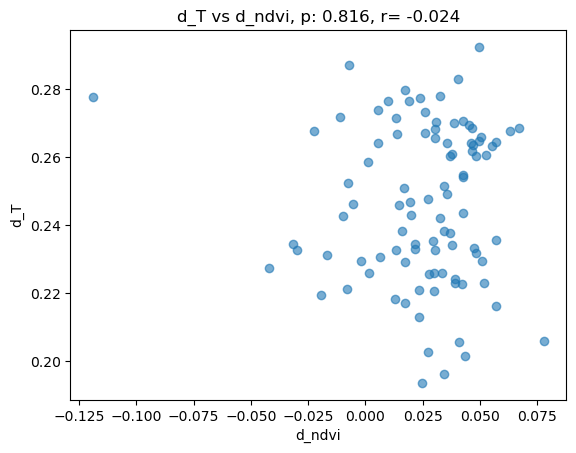

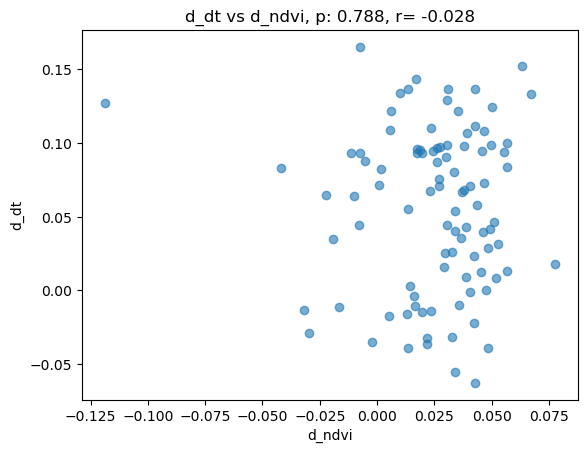

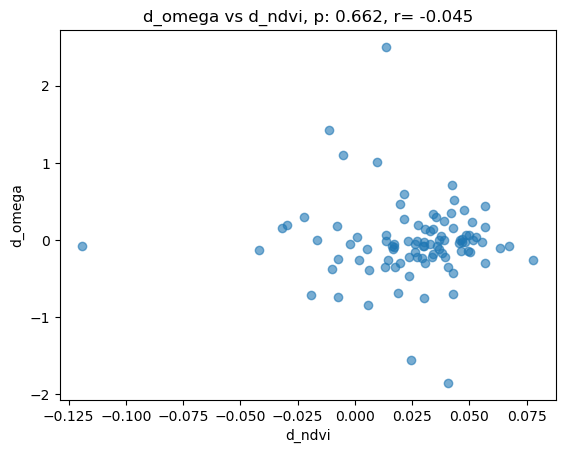

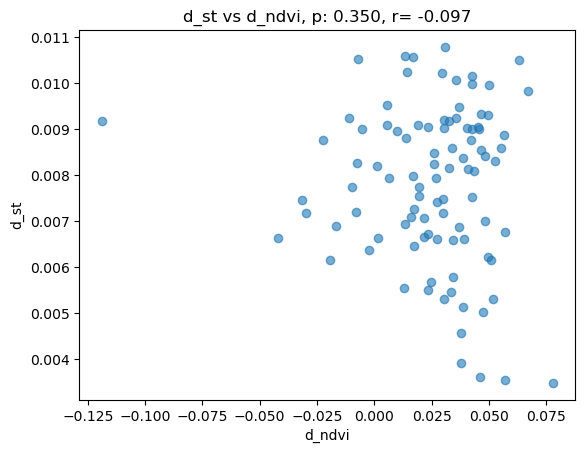

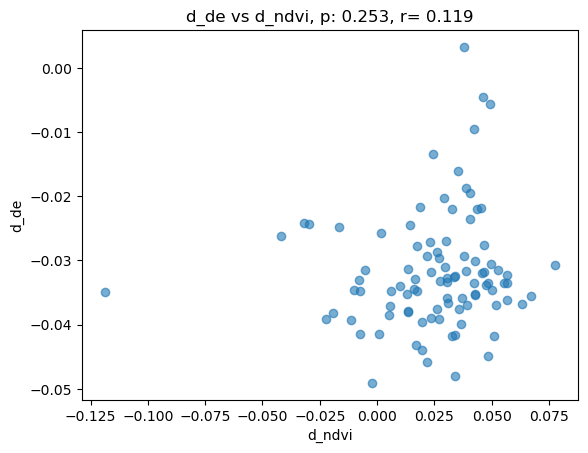

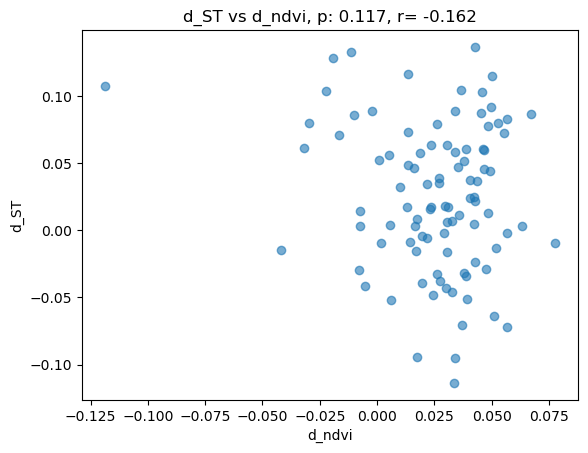

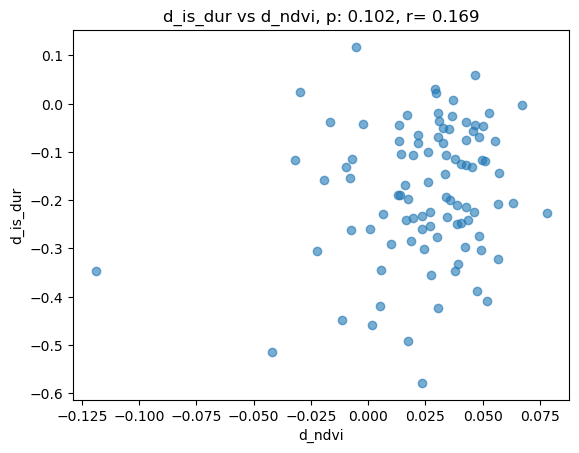

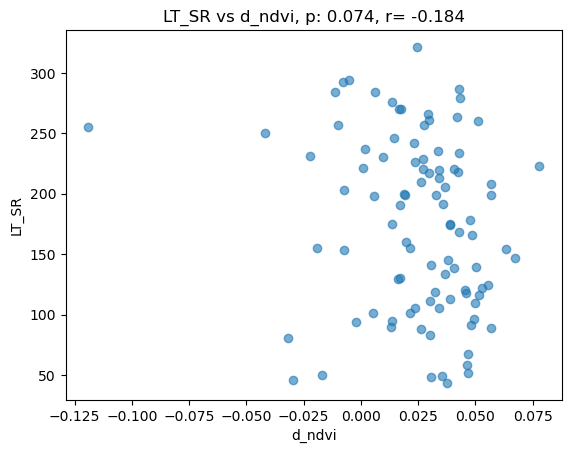

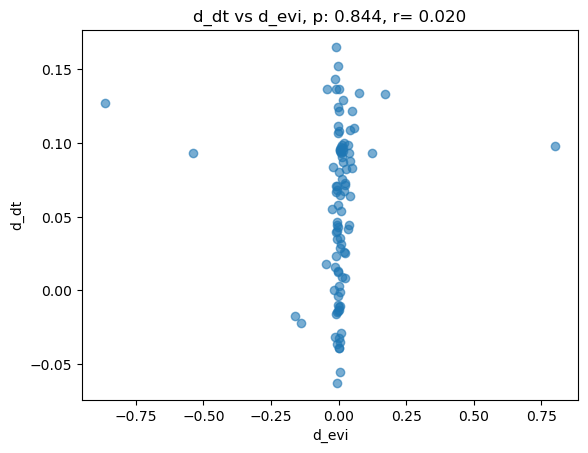

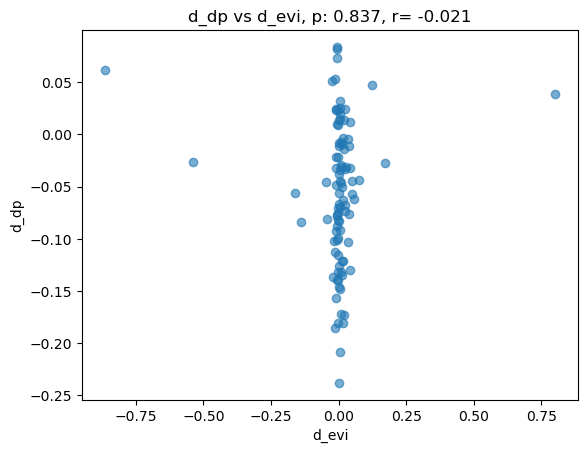

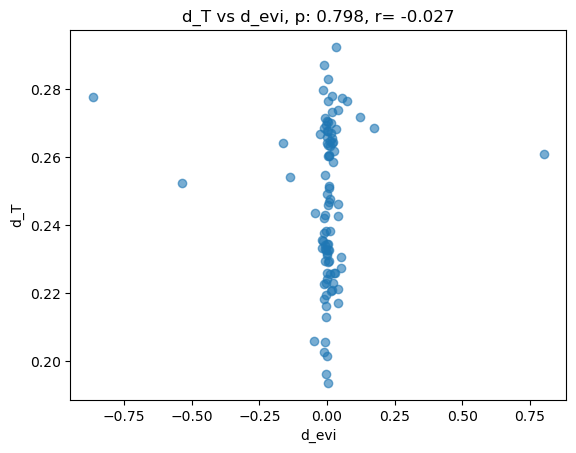

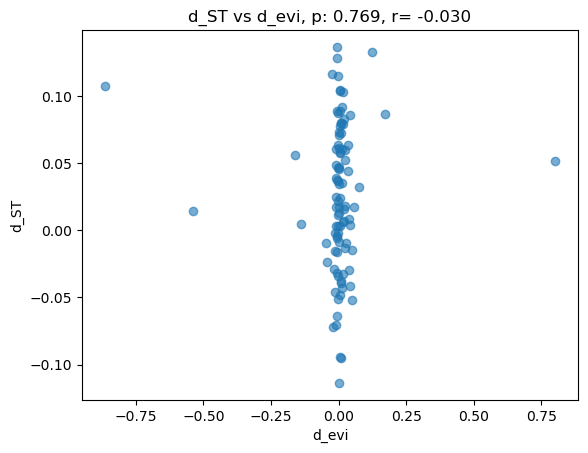

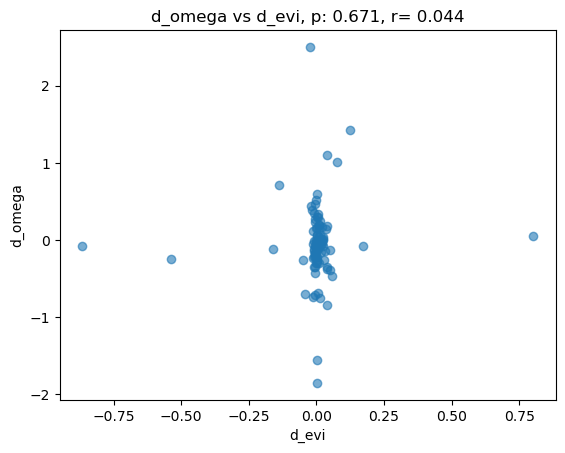

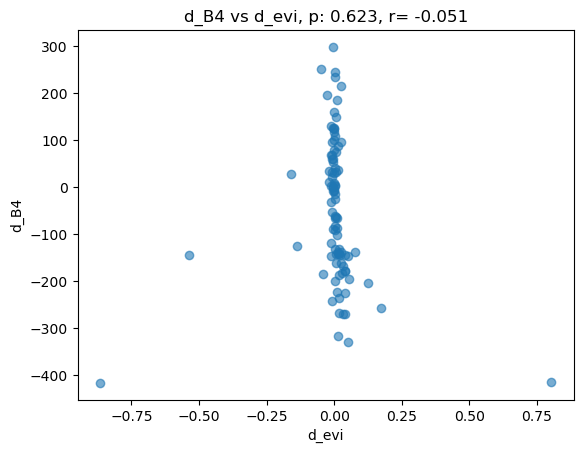

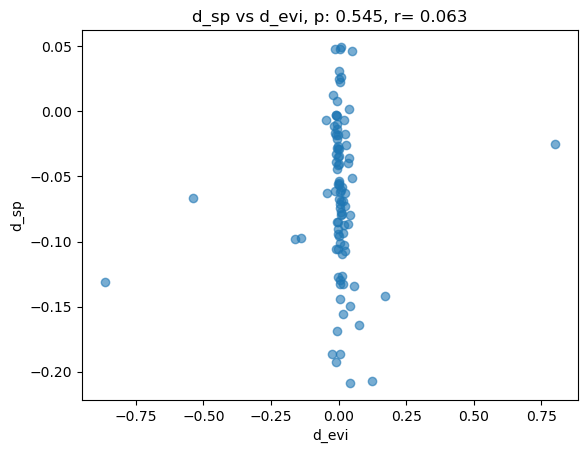

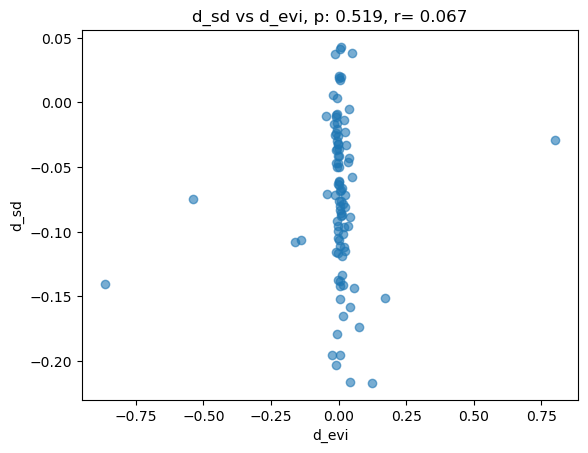

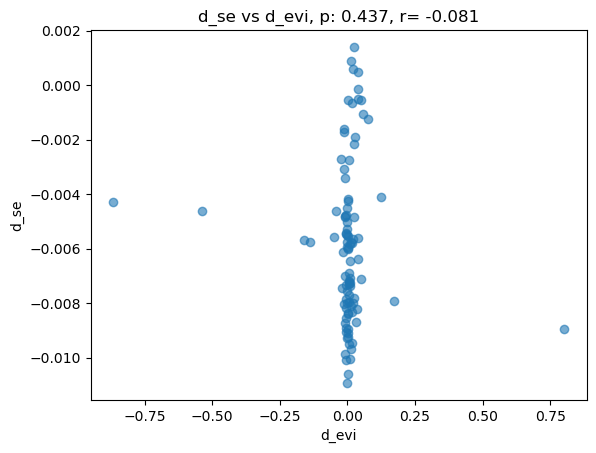

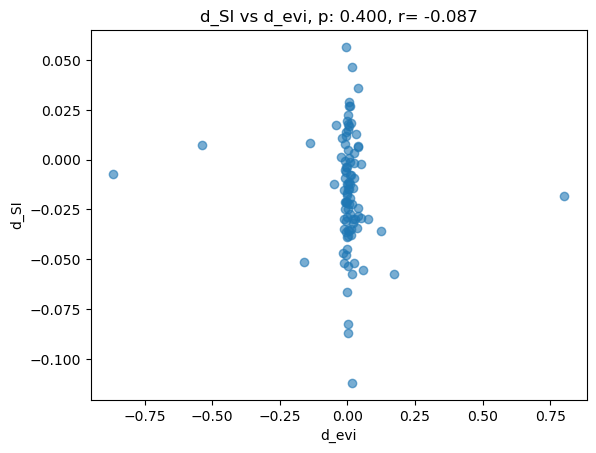

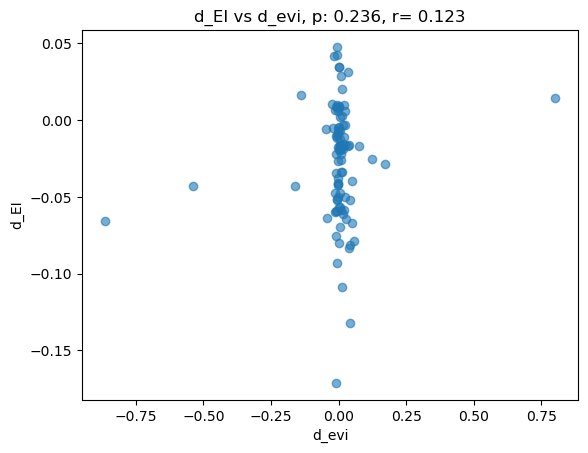

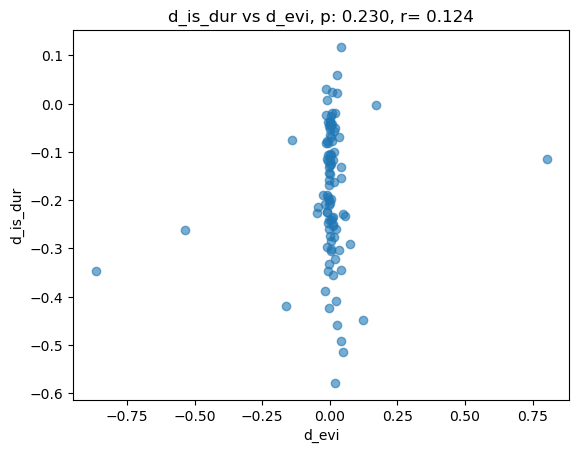

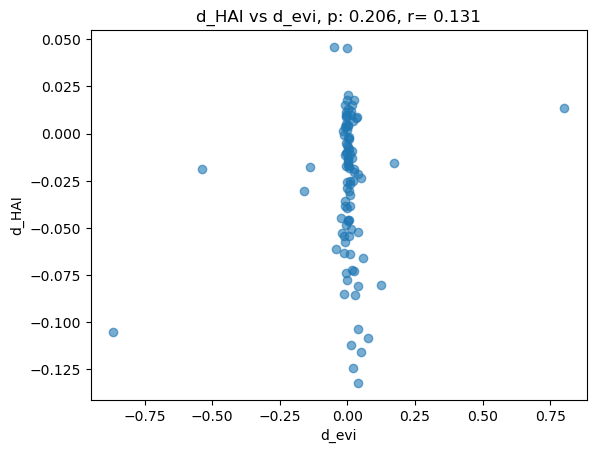

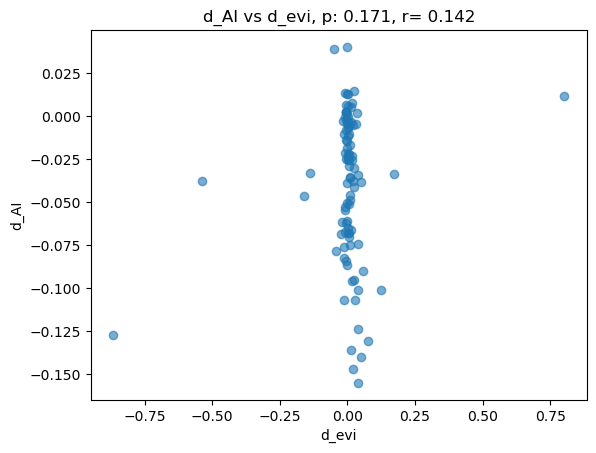

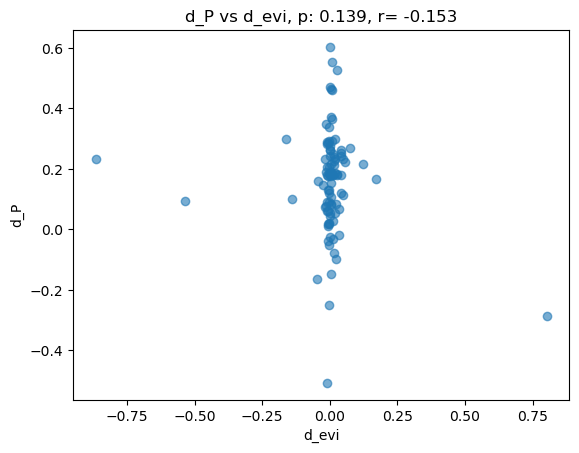

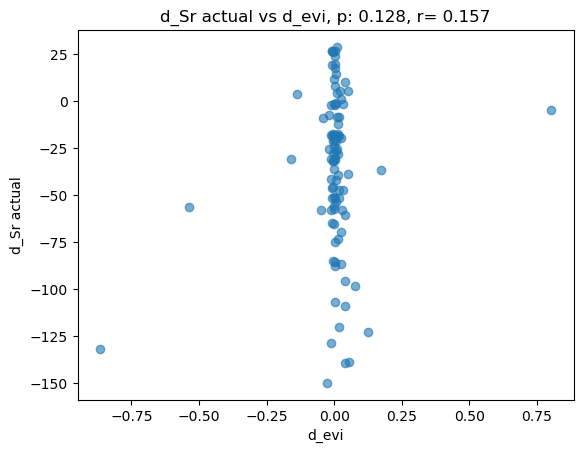

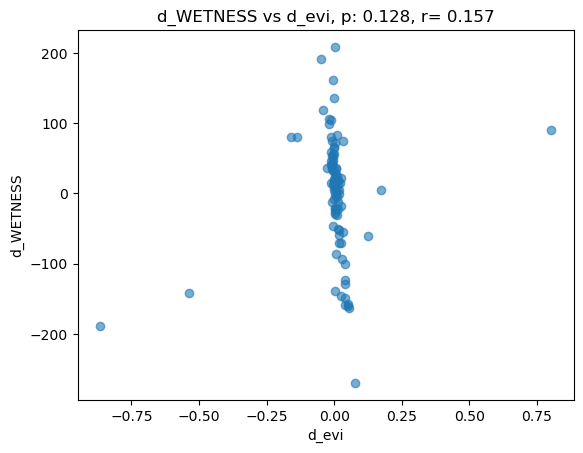

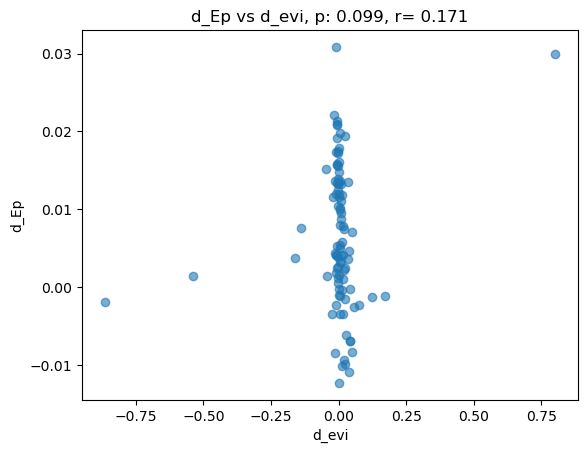

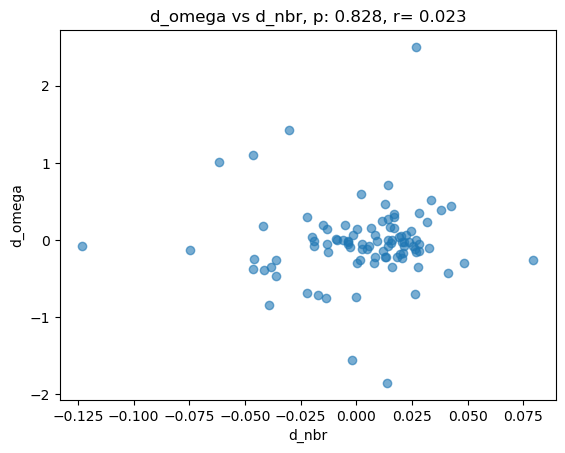

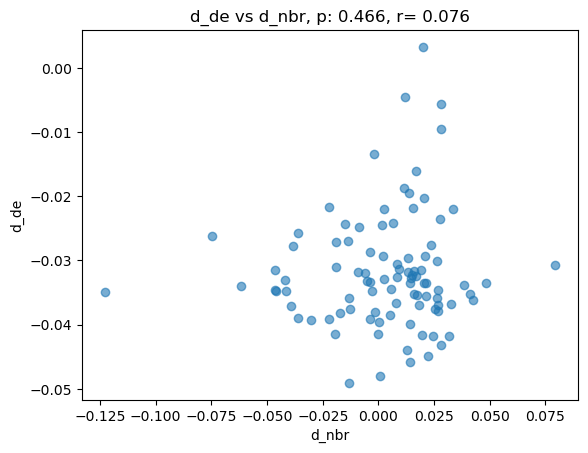

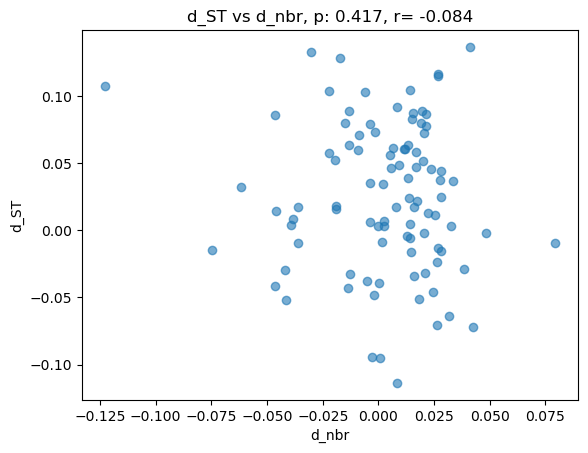

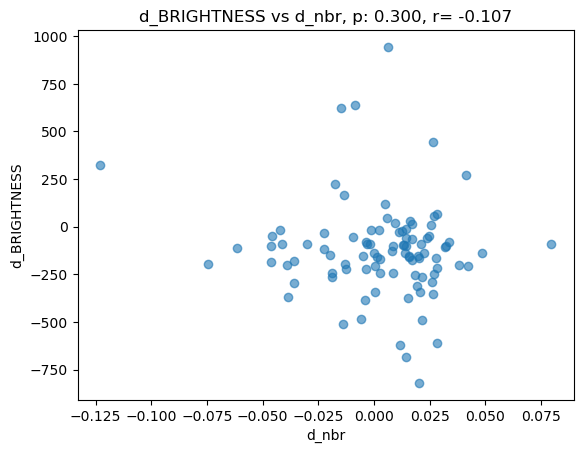

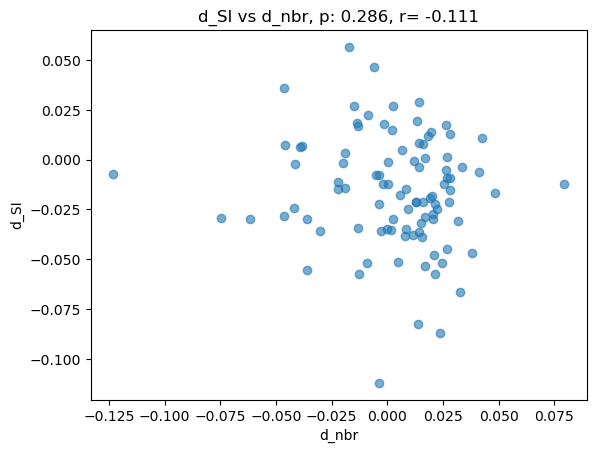

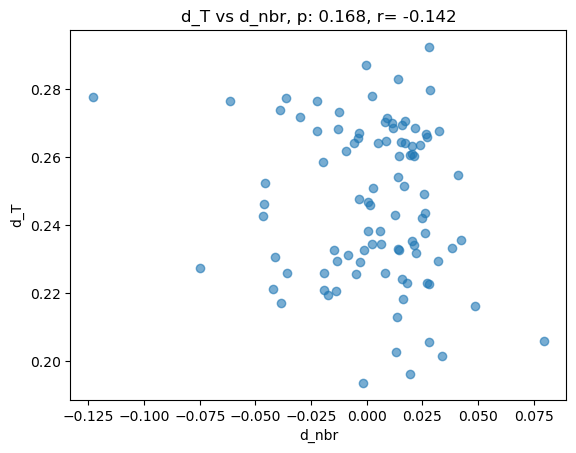

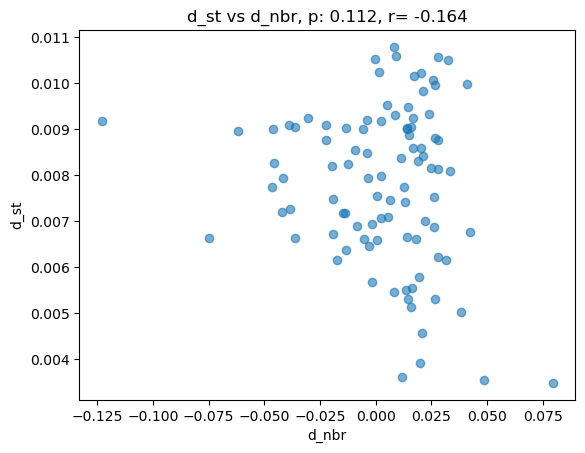

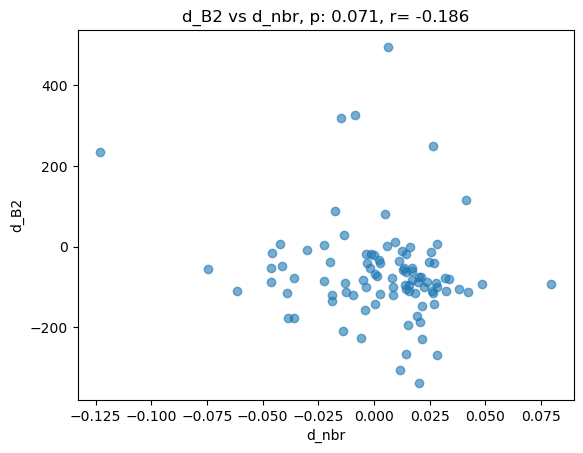

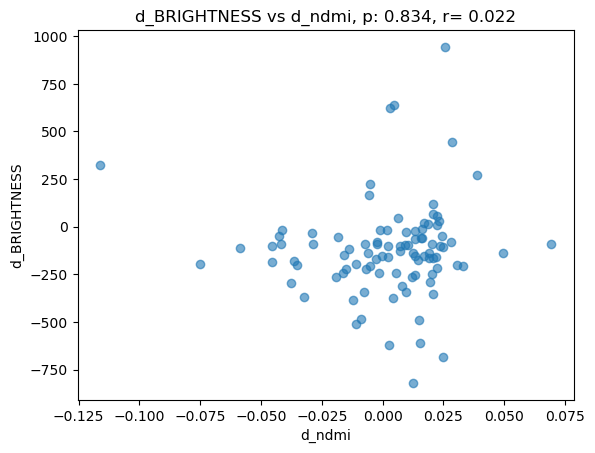

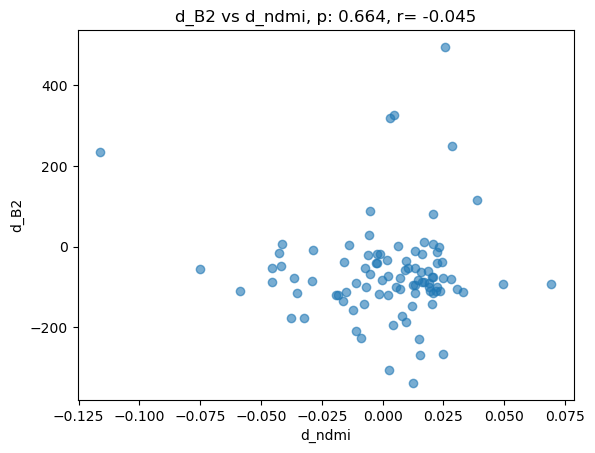

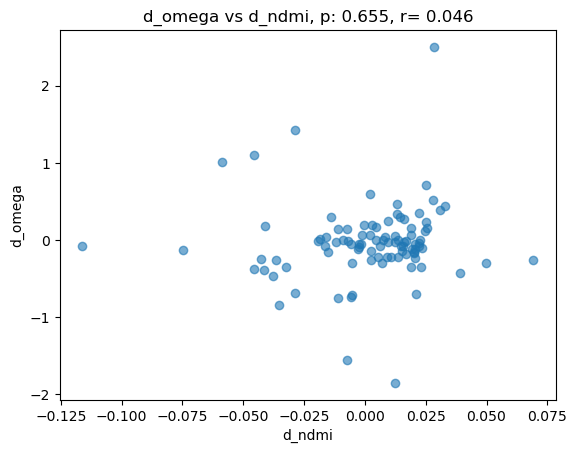

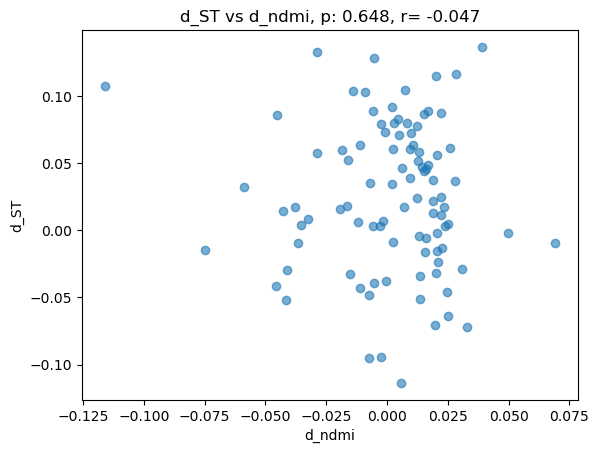

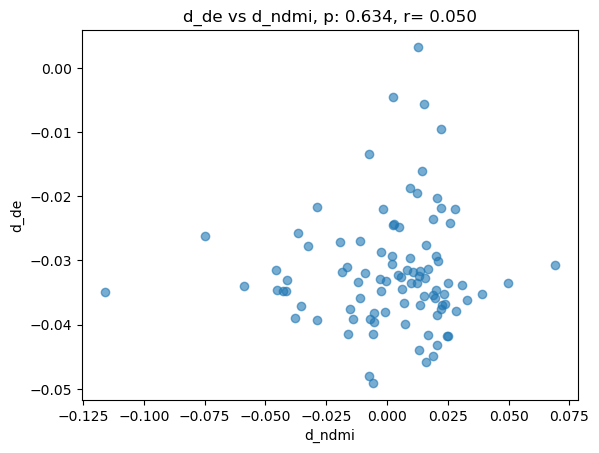

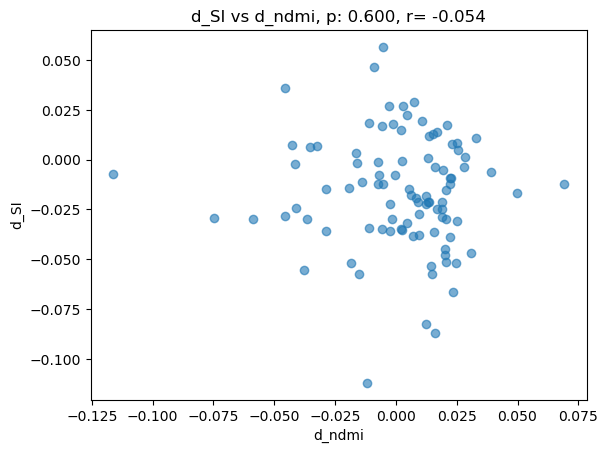

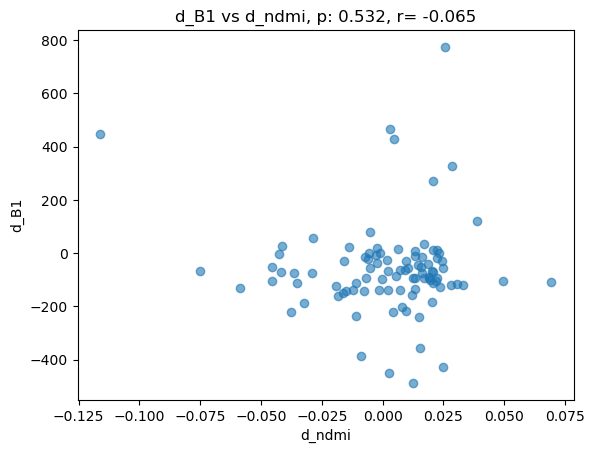

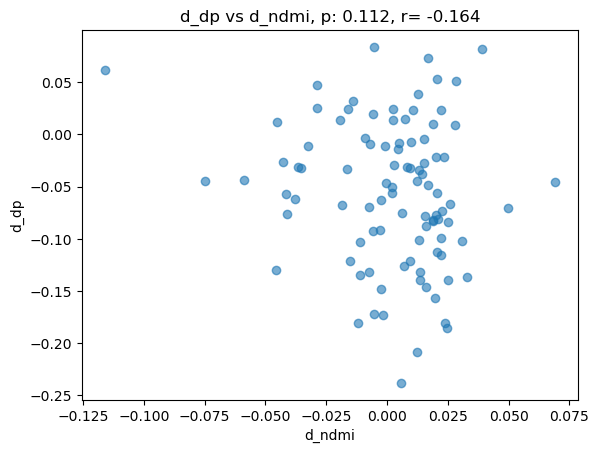

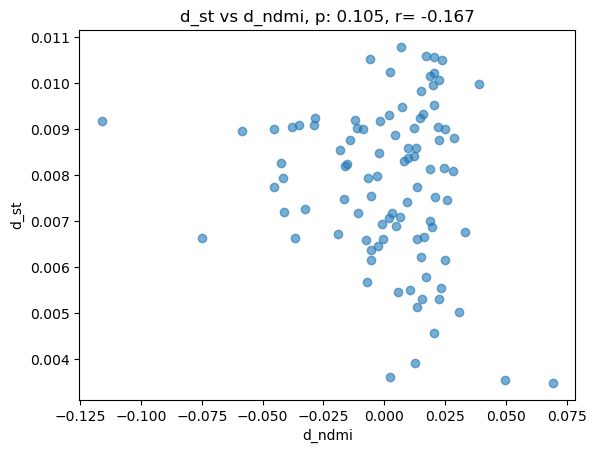

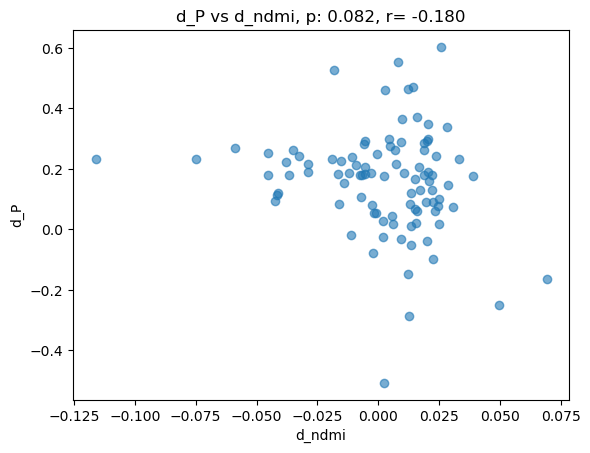

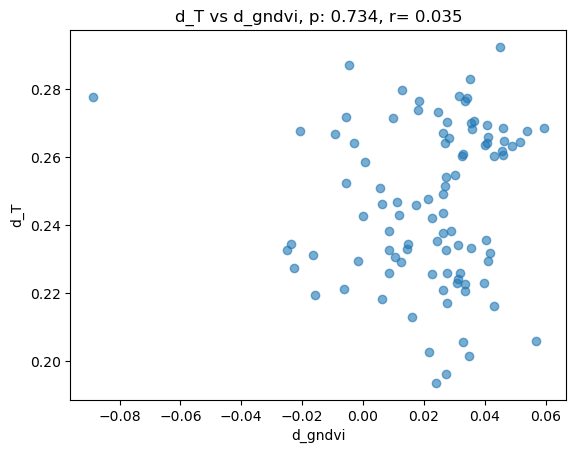

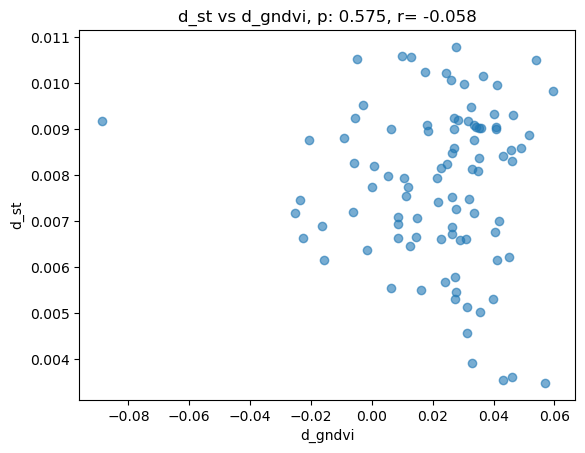

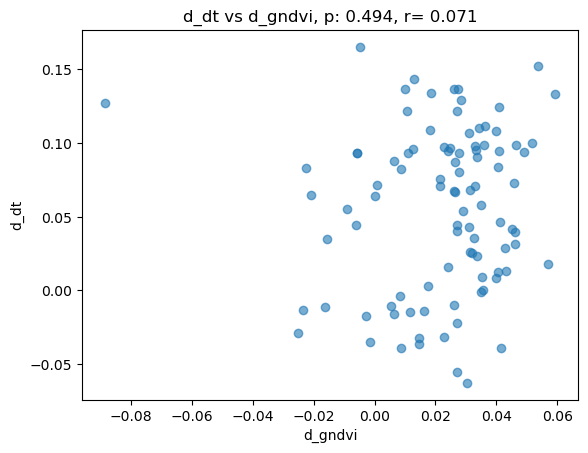

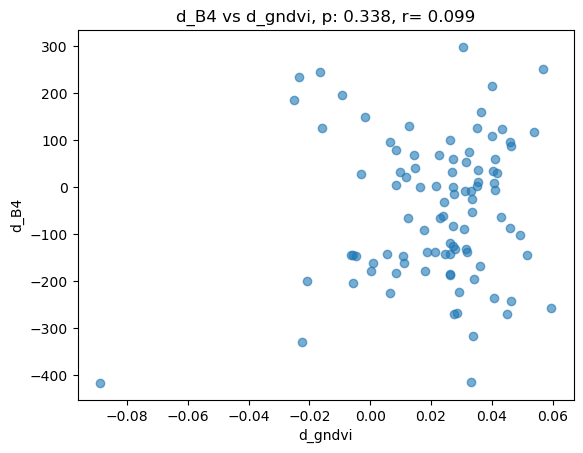

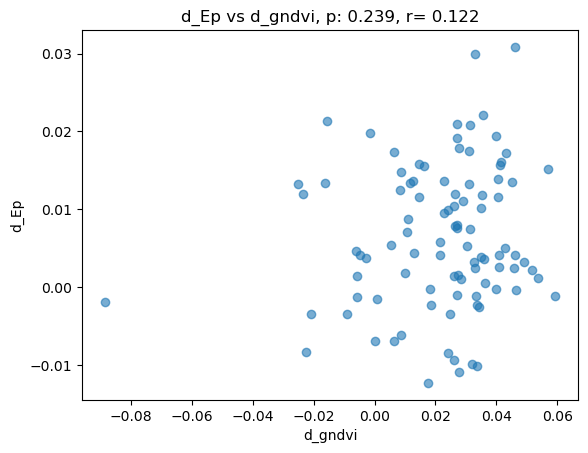

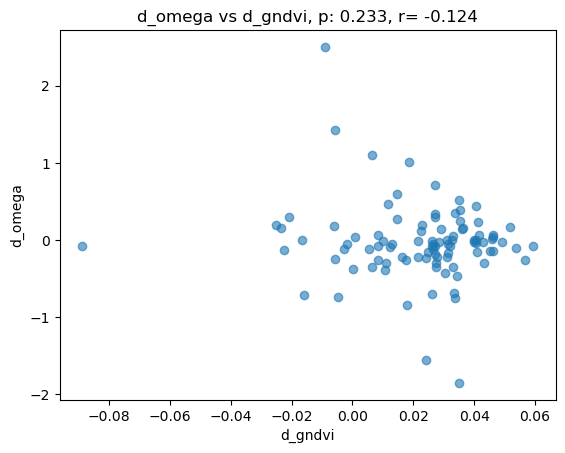

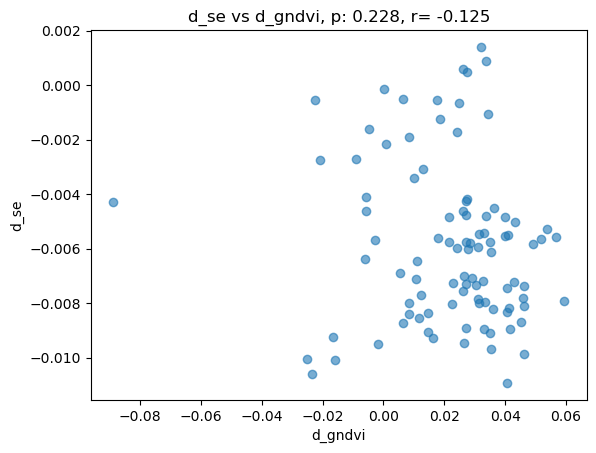

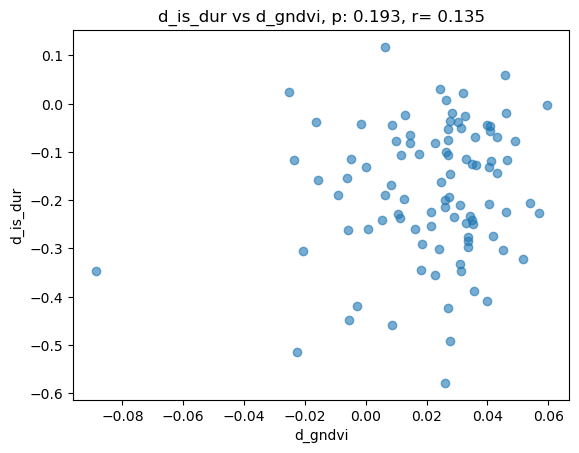

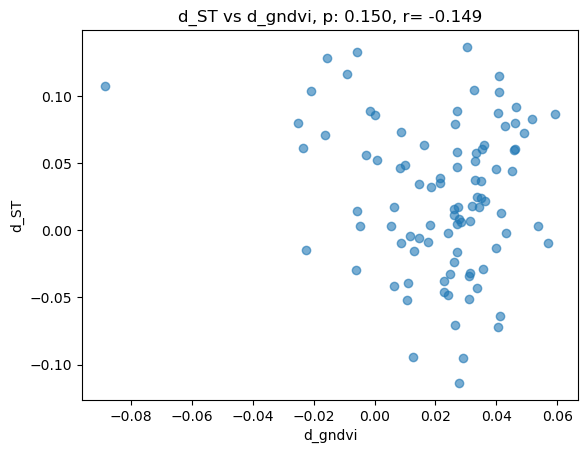

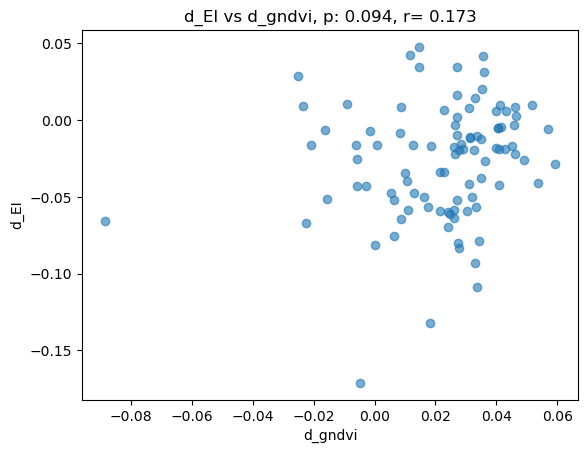

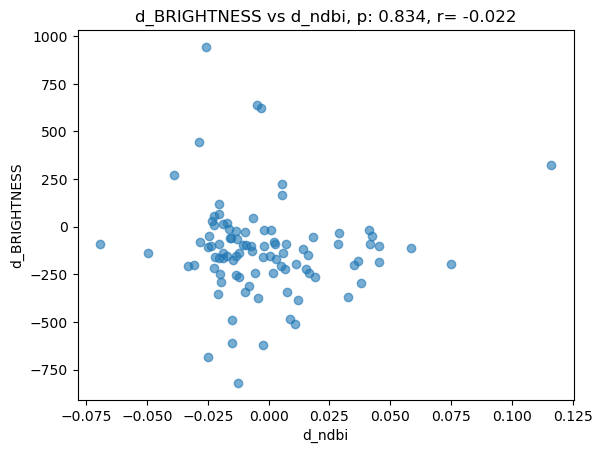

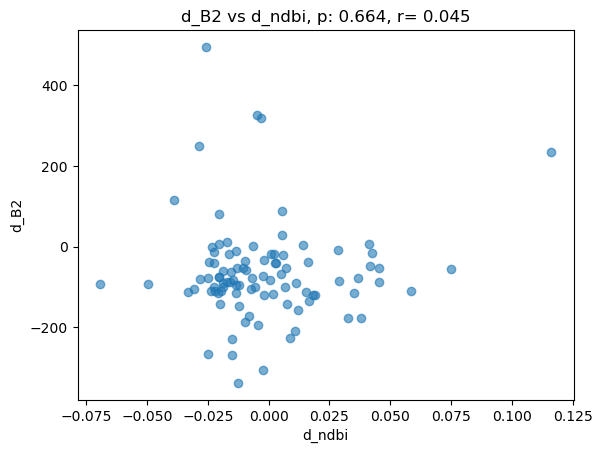

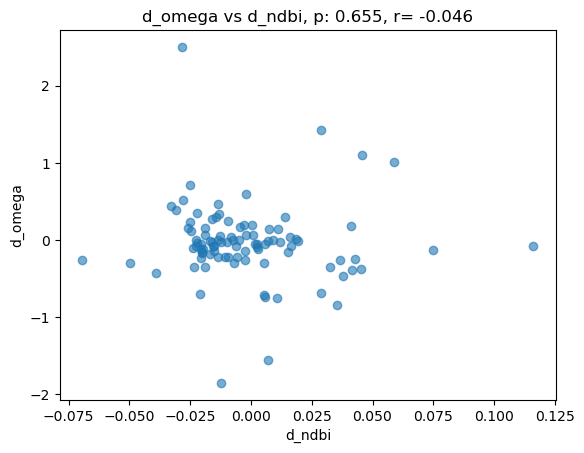

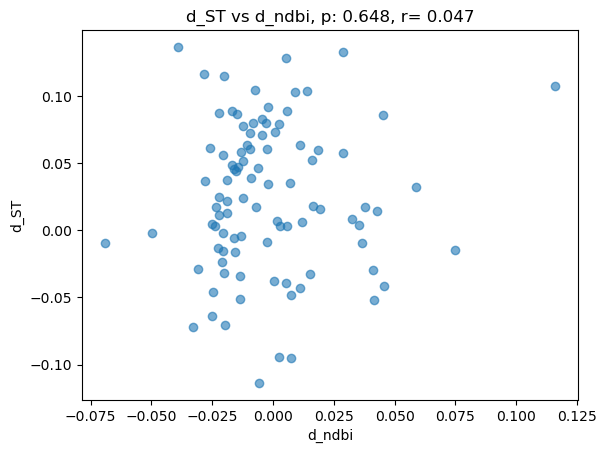

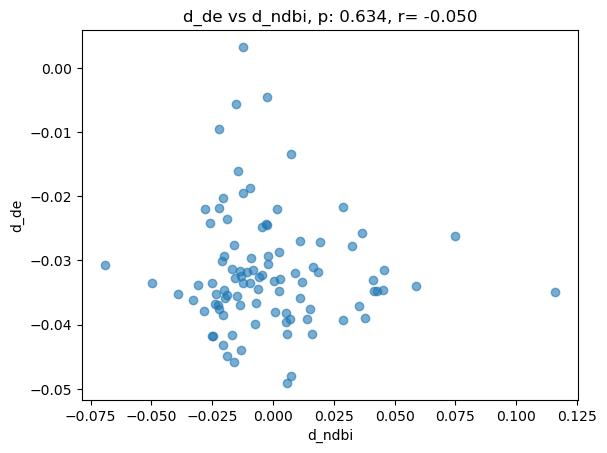

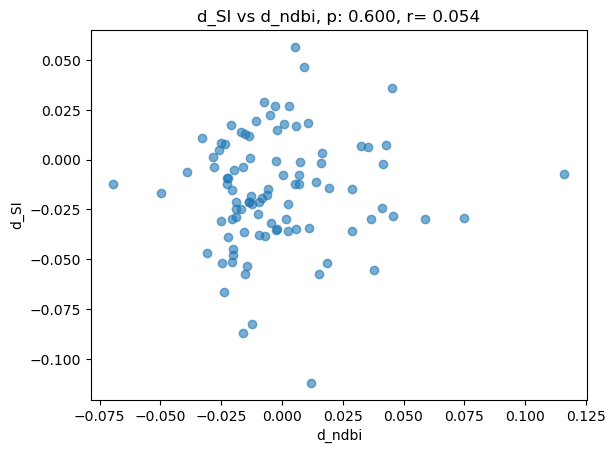

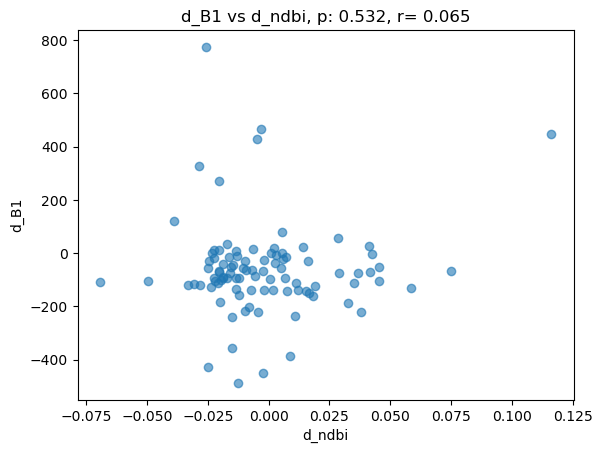

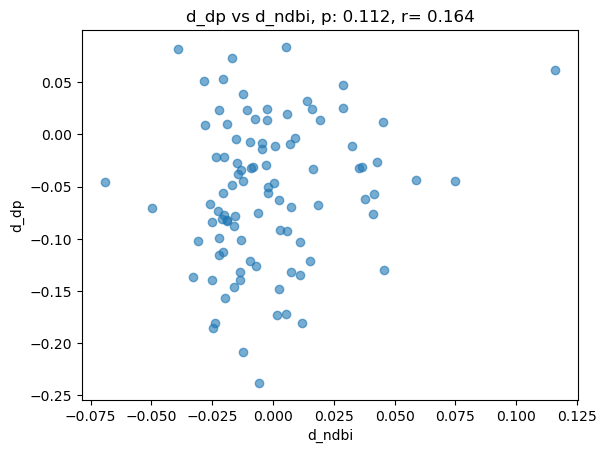

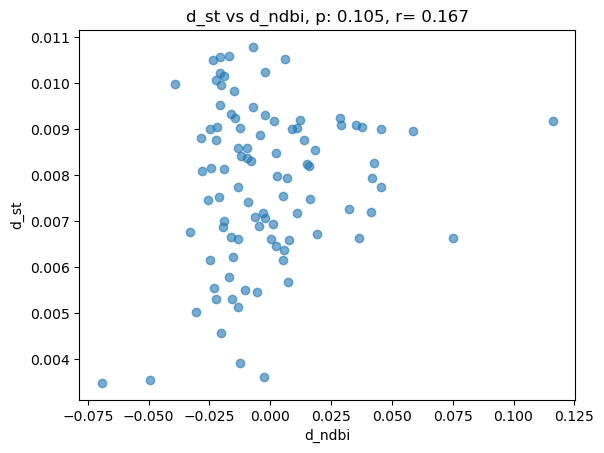

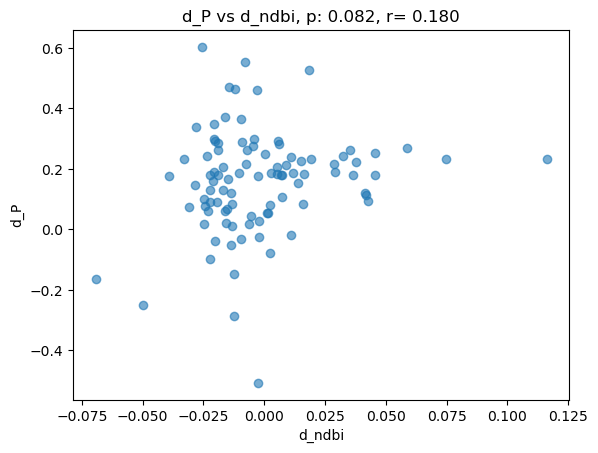

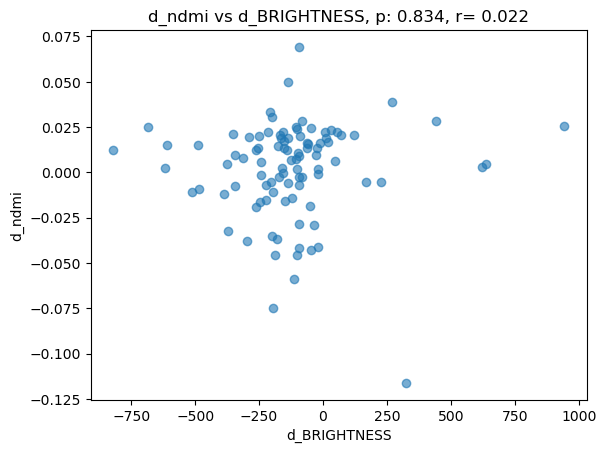

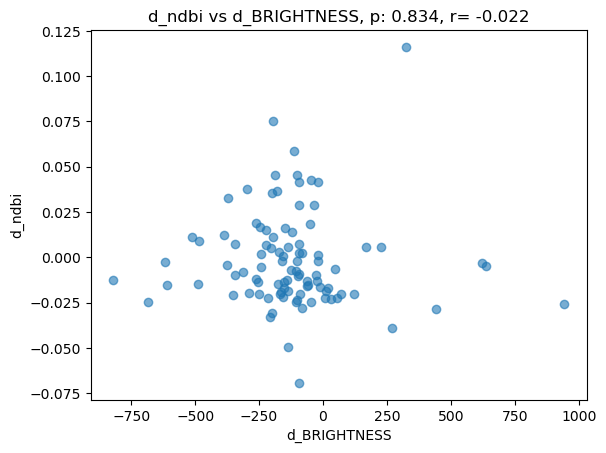

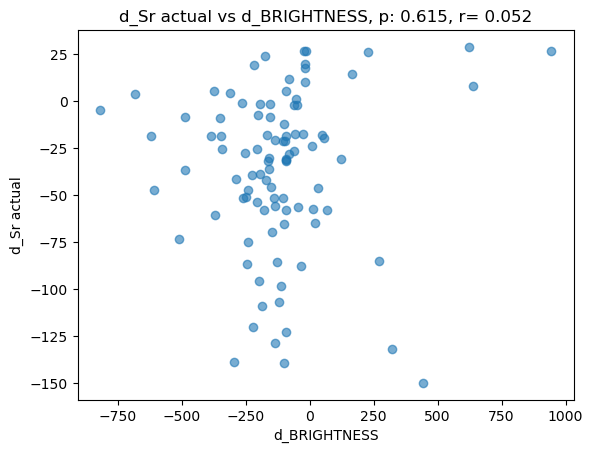

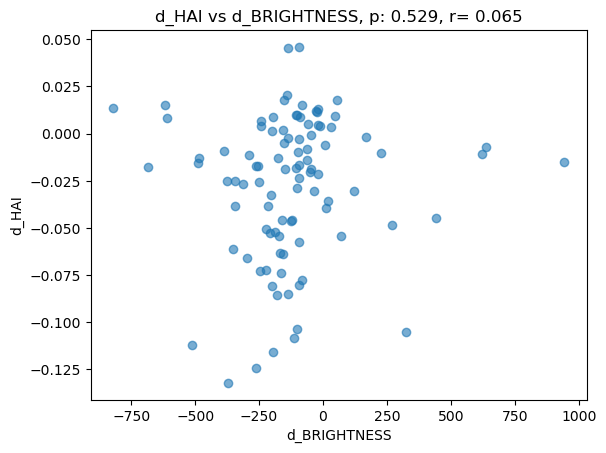

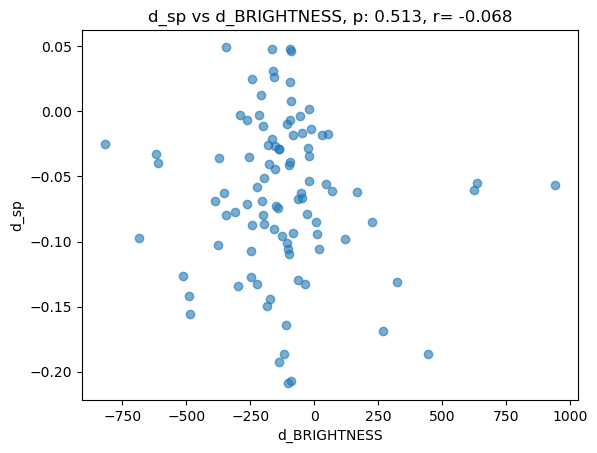

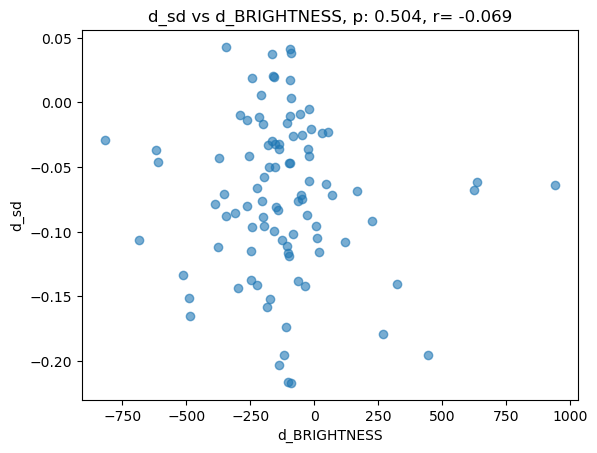

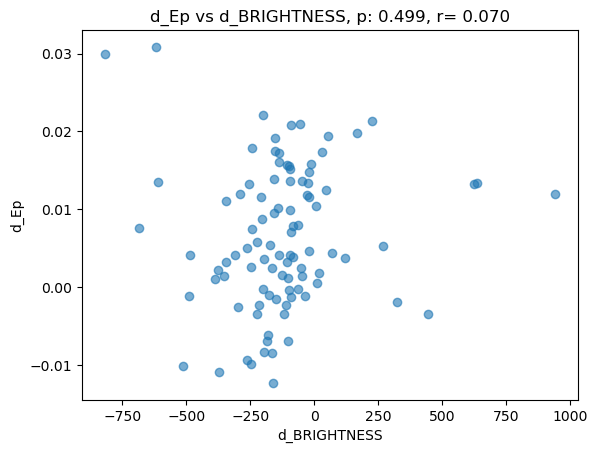

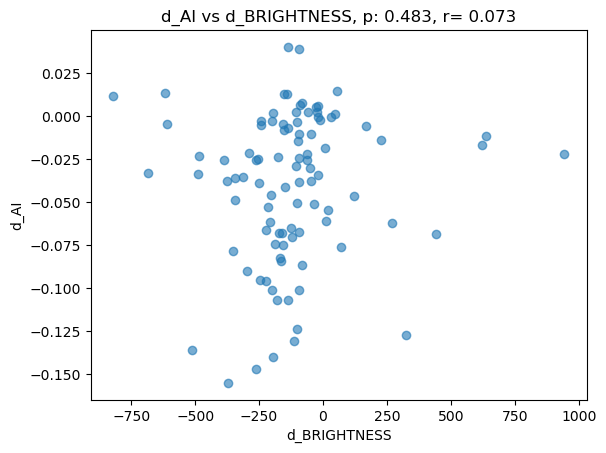

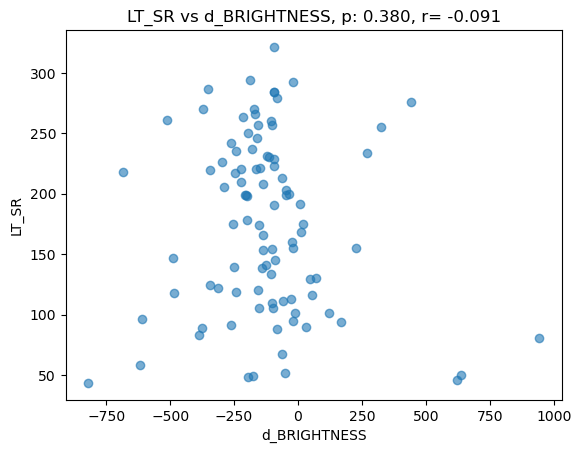

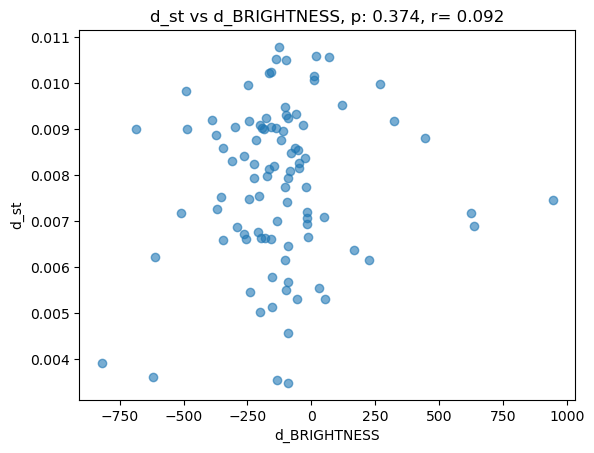

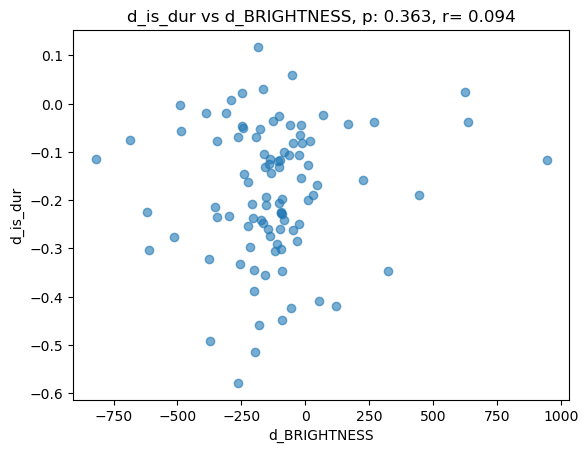

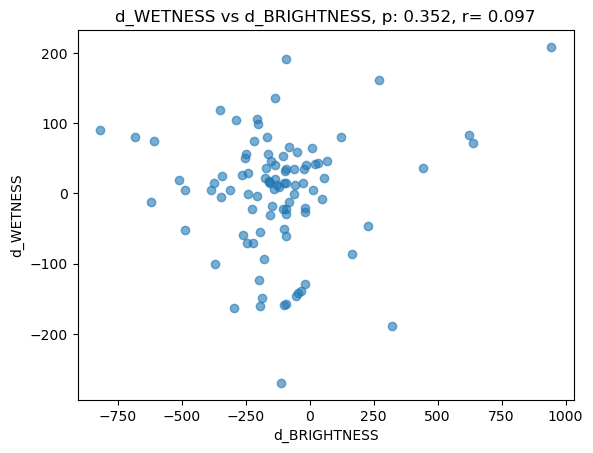

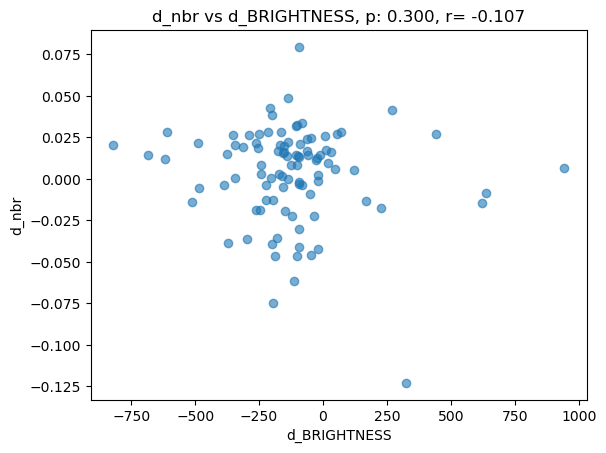

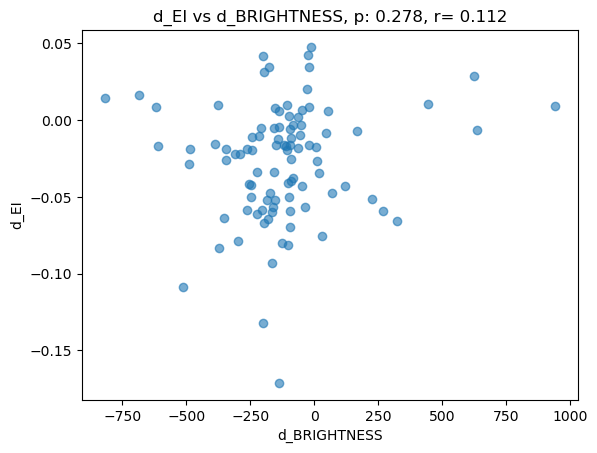

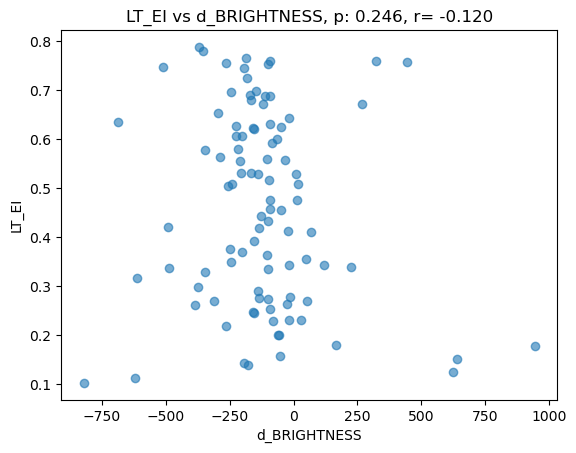

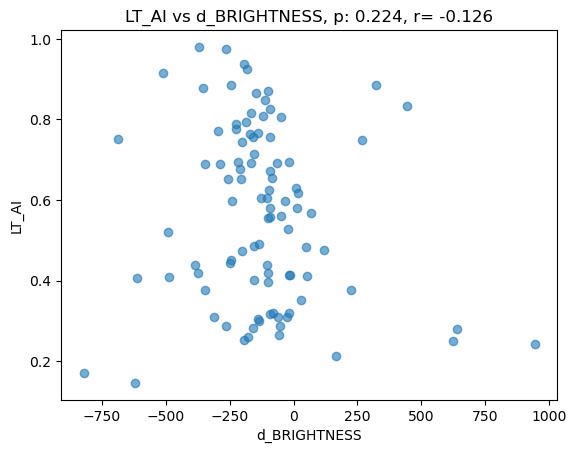

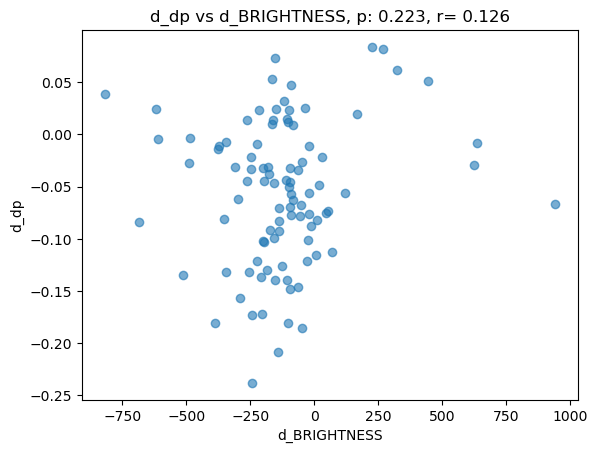

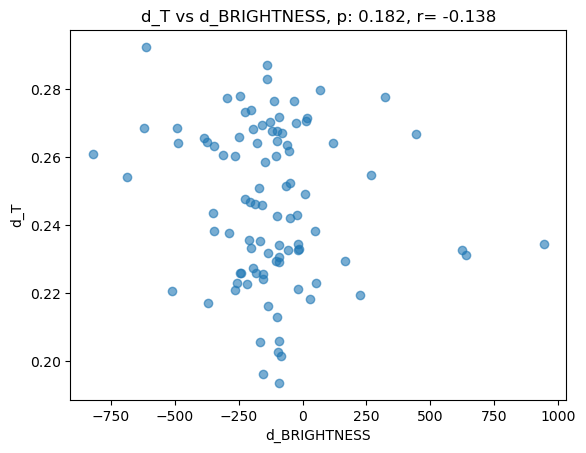

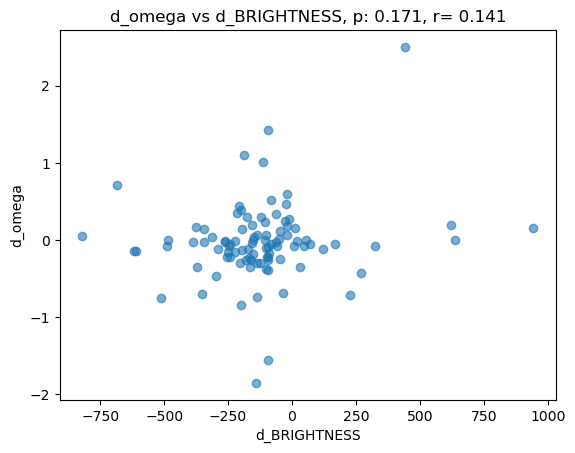

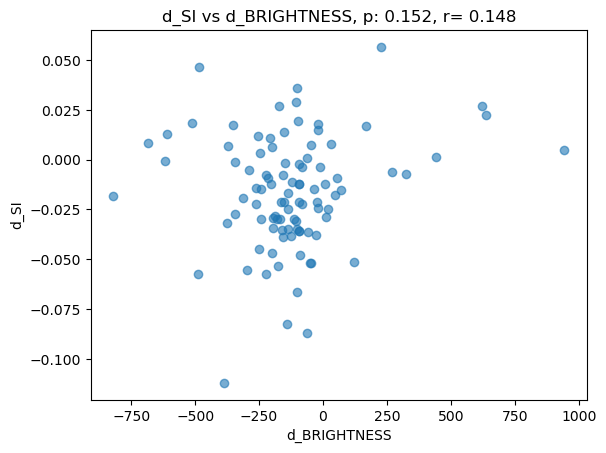

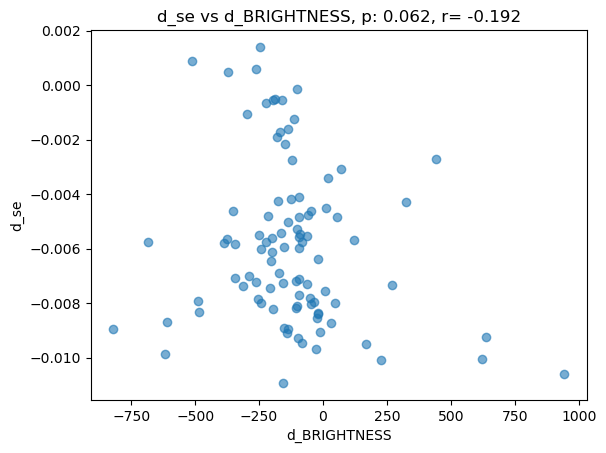

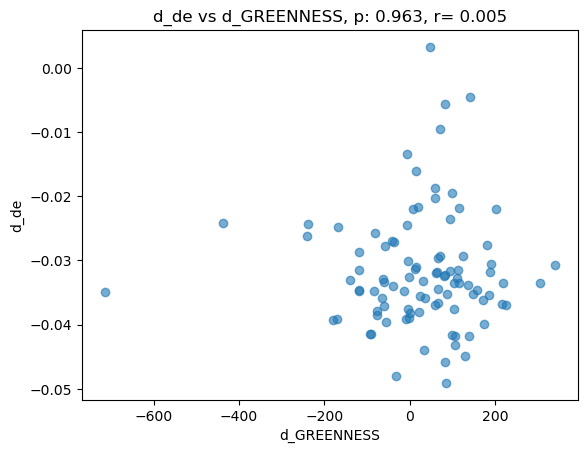

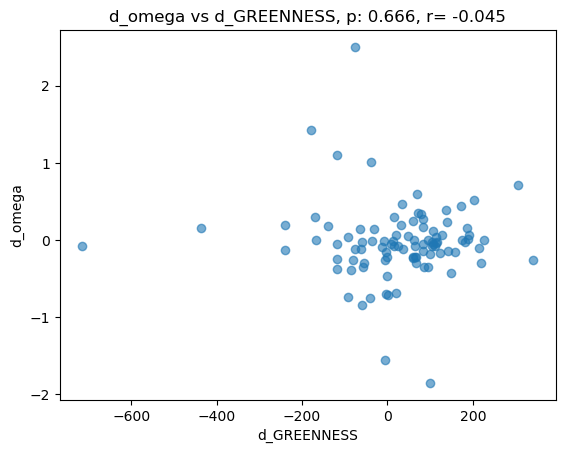

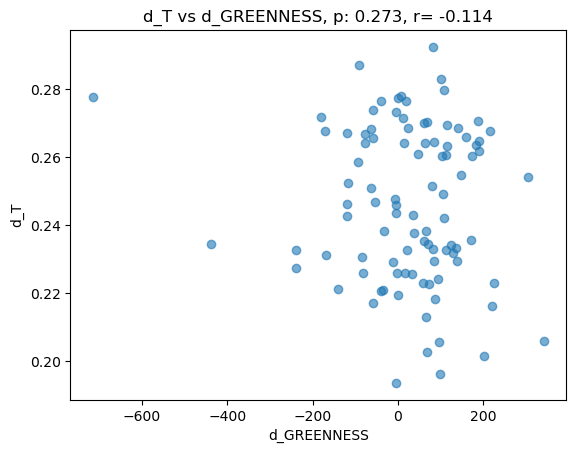

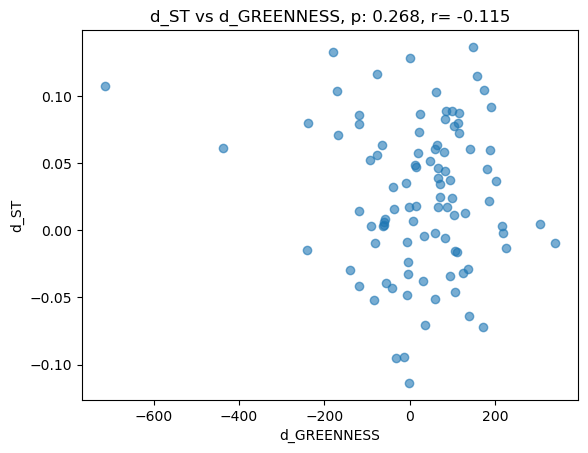

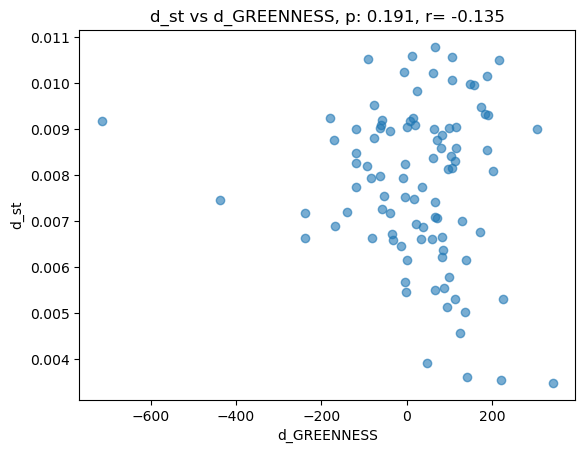

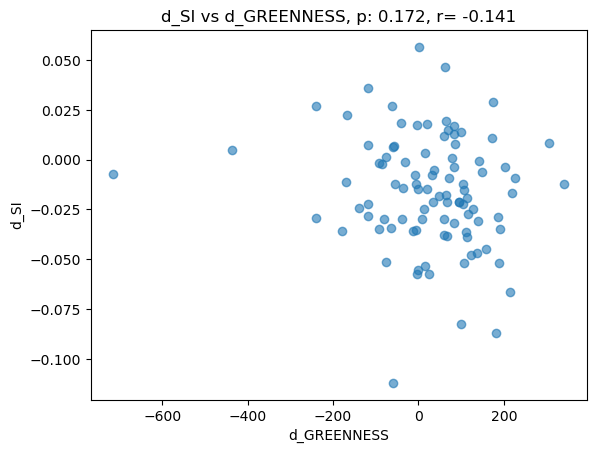

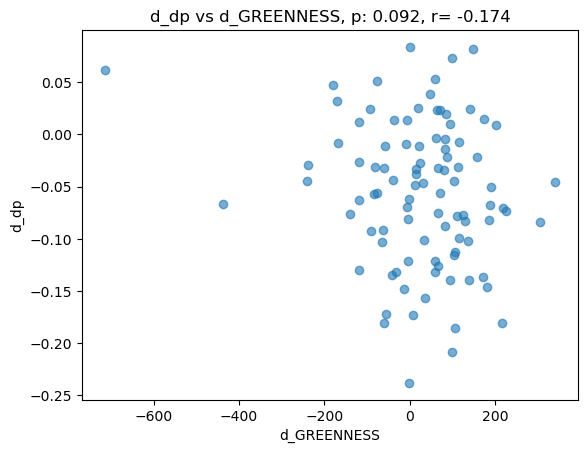

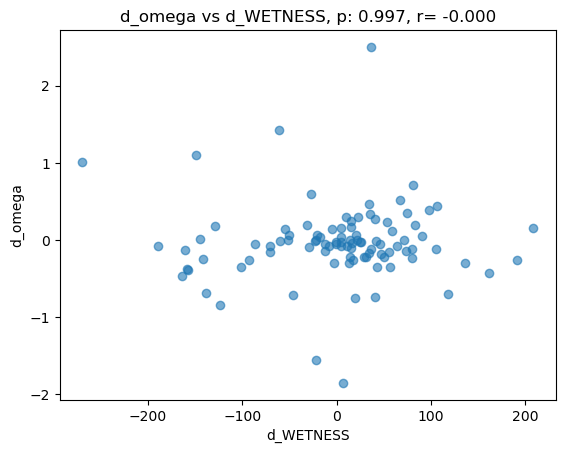

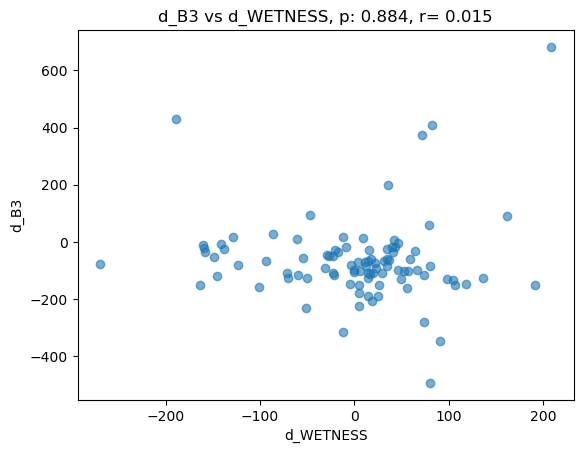

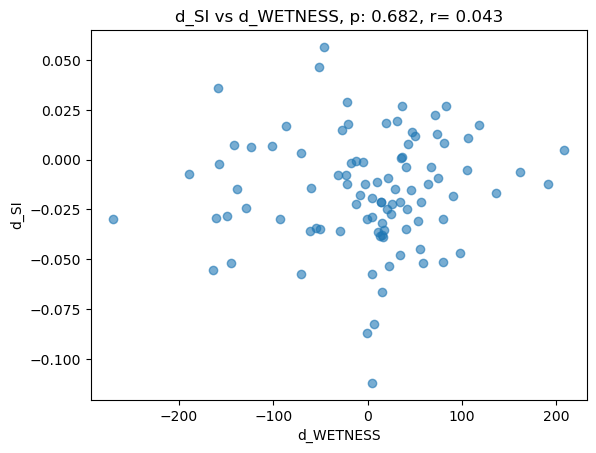

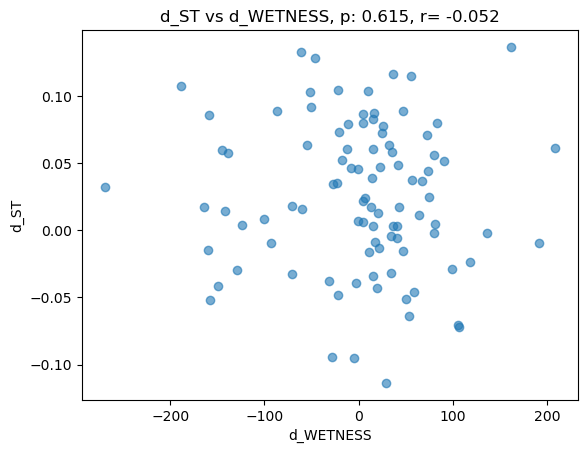

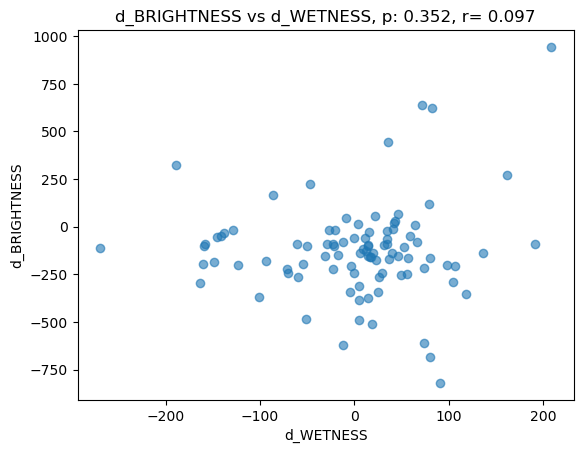

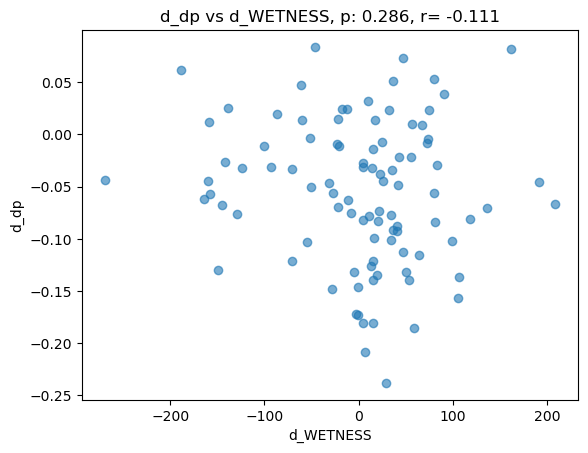

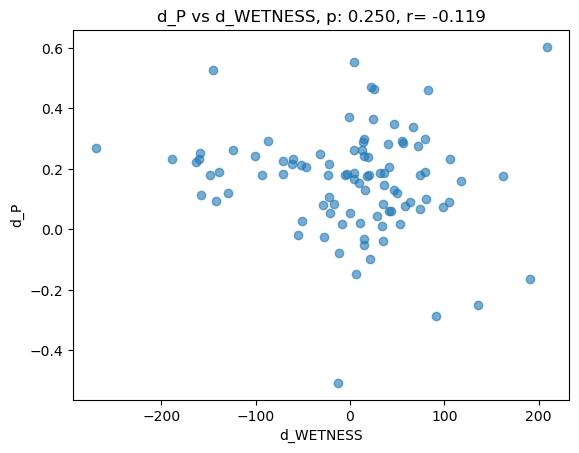

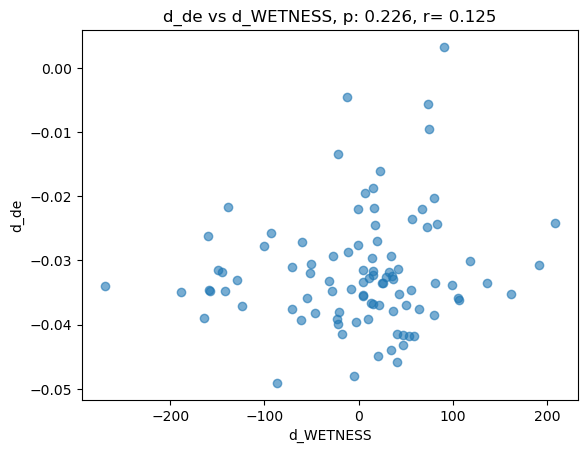

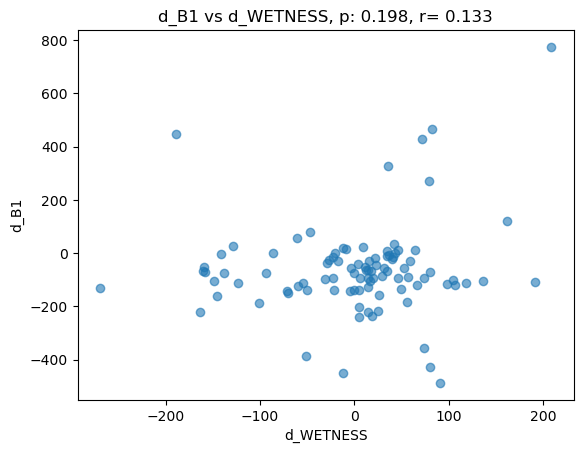

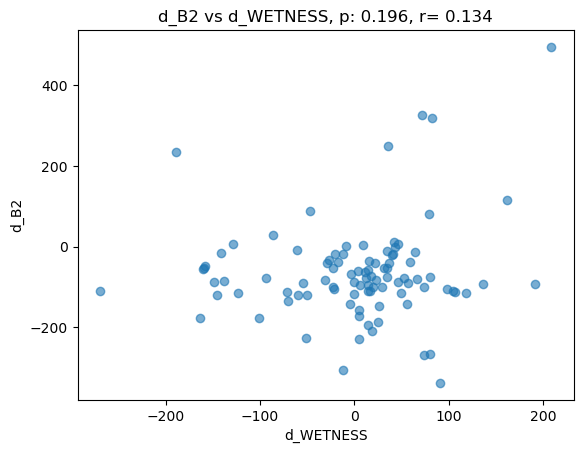

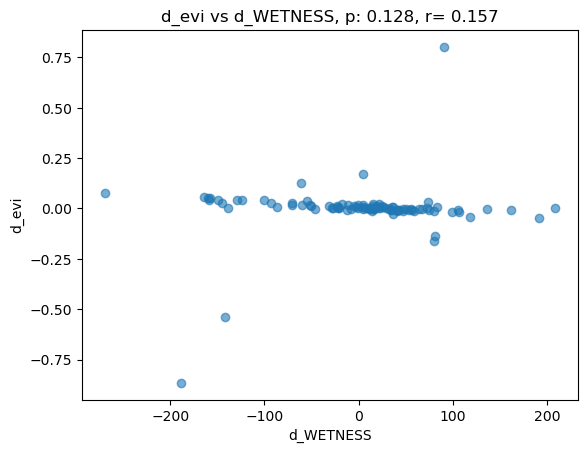

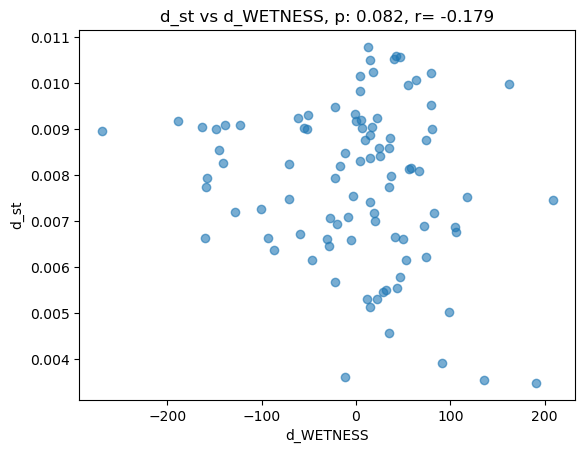

In [28]:
plot_descending_P(keys_list[7:], df_delta_all, sorted_delta_p, prs_delta_r, delta=True)

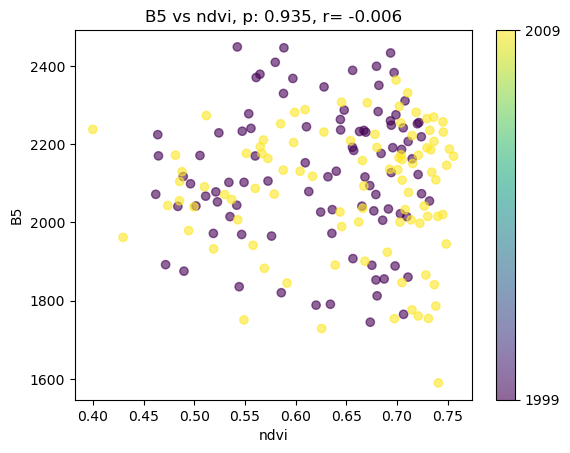

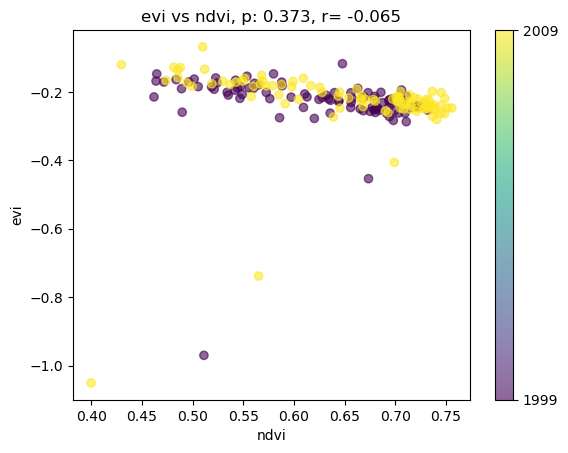

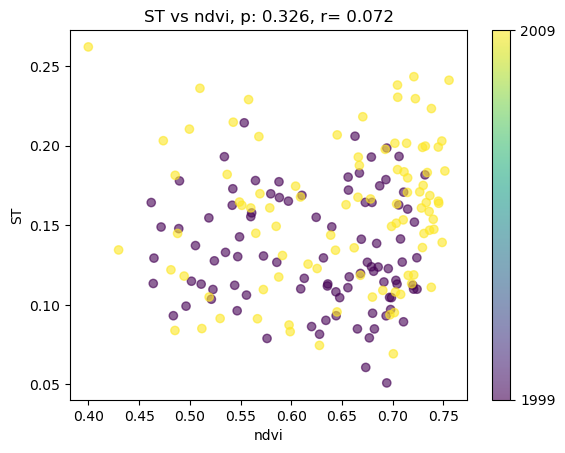

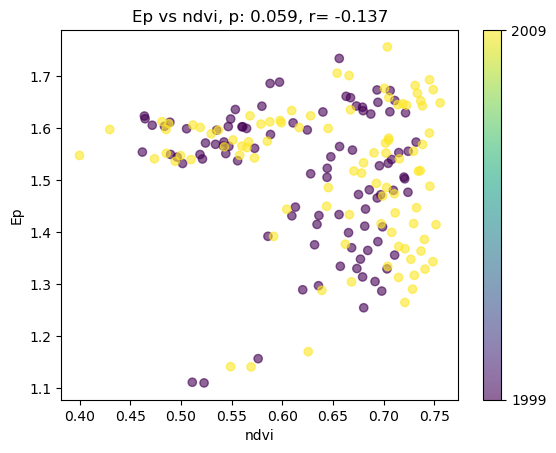

In [29]:
plot_descending_P(['ndvi'], df_all, sorted_p, prs_r, delta=False)

## Export MK trends to Table

- derived from spectral bands and indices the timeseries are tested for significance of trend
- plots are the distribution of slope of trend currently

B1: min:-36.36202234227443, max:2.589894319657479
B2: min:-25.95066862734924, max:2.944945774884573
B3: min:-28.95443613299915, max:4.656478562634057
B4: min:-27.104995377877806, max:25.30923791972748
B5: min:-29.23345068912157, max:12.119731511015637
B7: min:-20.435472516403635, max:8.488861395728165
BRIGHTNESS: min:-57.78041387741291, max:11.802458498522753
GREENNESS: min:-17.665565061103287, max:50.89516884851888
WETNESS: min:-18.686134843240925, max:20.46595420943754
evi: min:-0.007105267741358404, max:0.010651354299843773
gndvi: min:-0.0020298959347451063, max:0.007340464986396061
nbr: min:-0.0044518599651741046, max:0.007453181034015412
ndbi: min:-0.008354729533917506, max:0.004436383626818789
ndmi: min:-0.004436383626818789, max:0.008354729533917506
ndvi: min:-0.0032837748959108127, max:0.009950038864714628


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

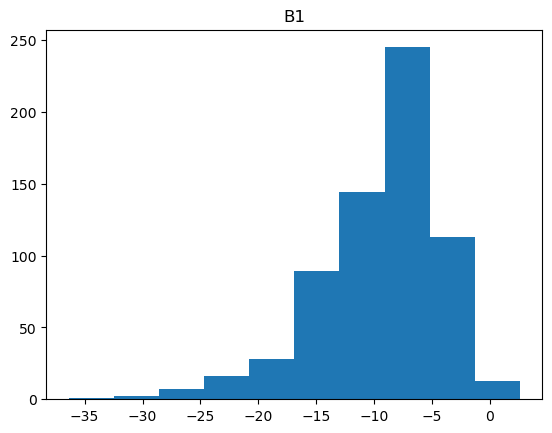

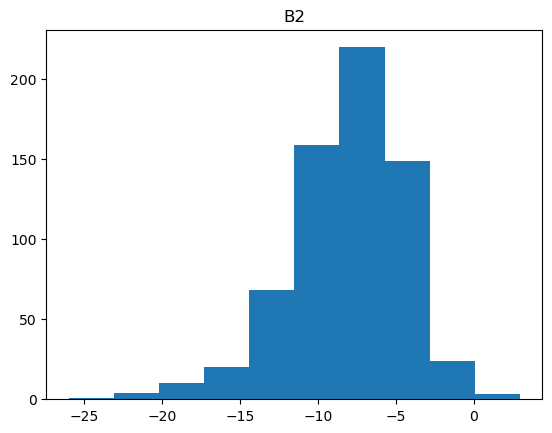

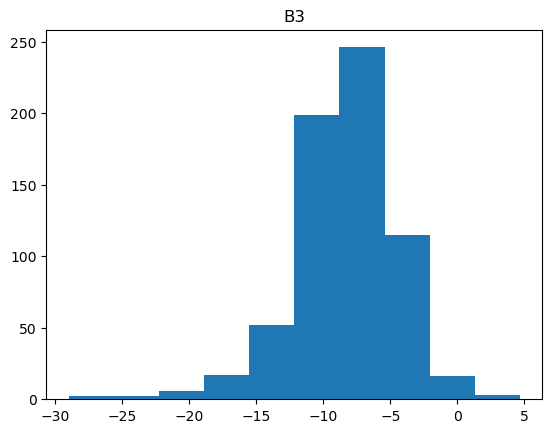

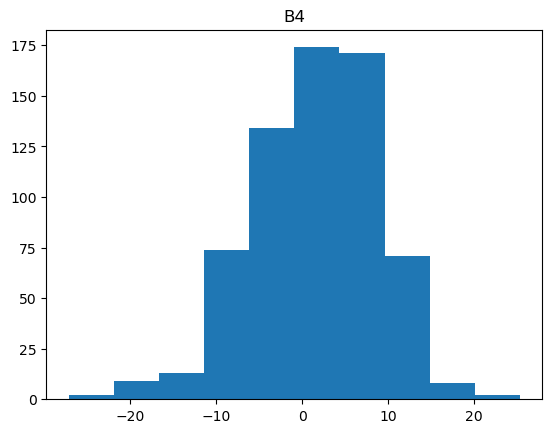

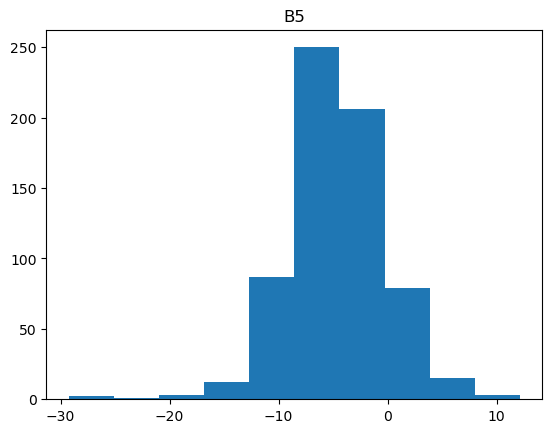

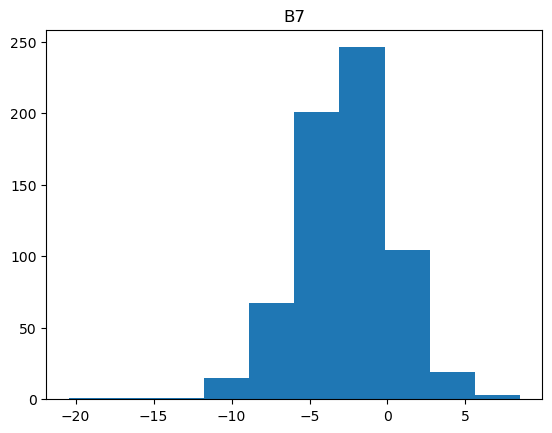

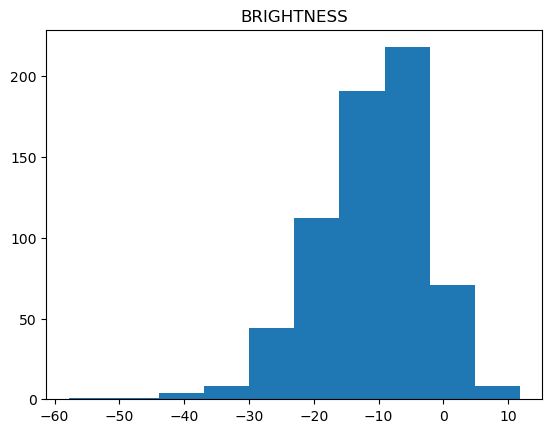

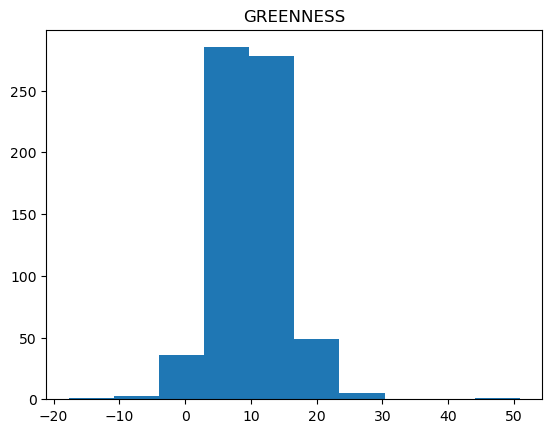

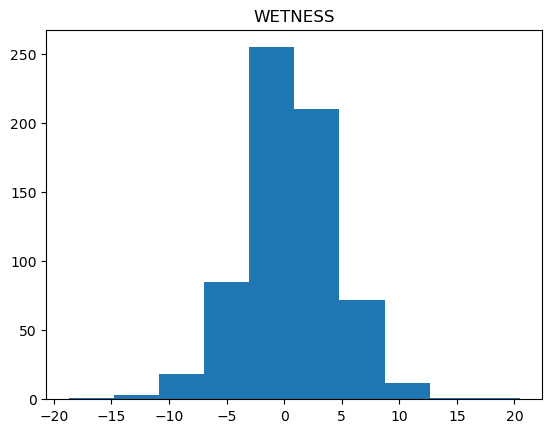

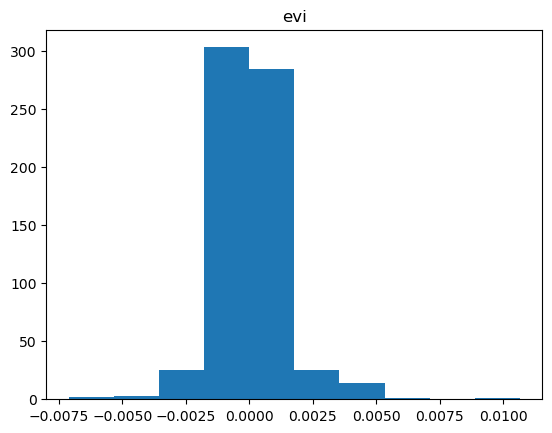

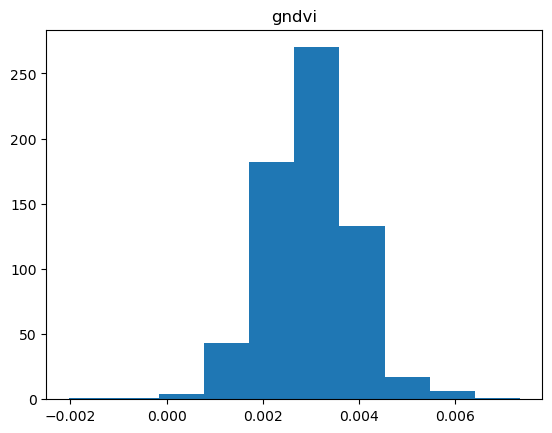

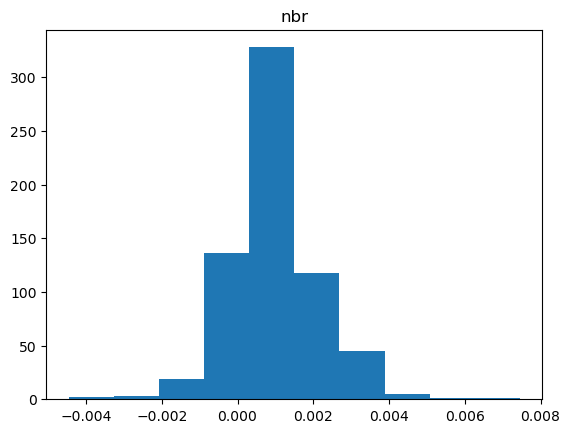

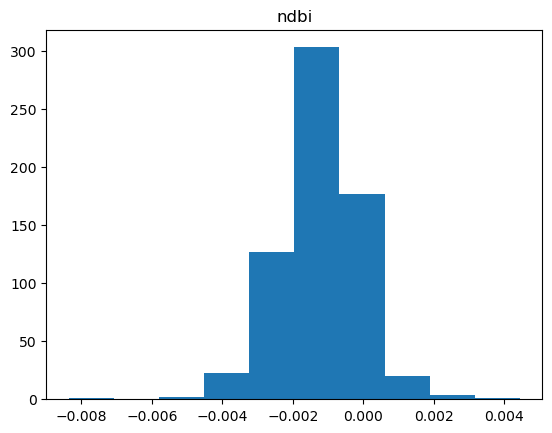

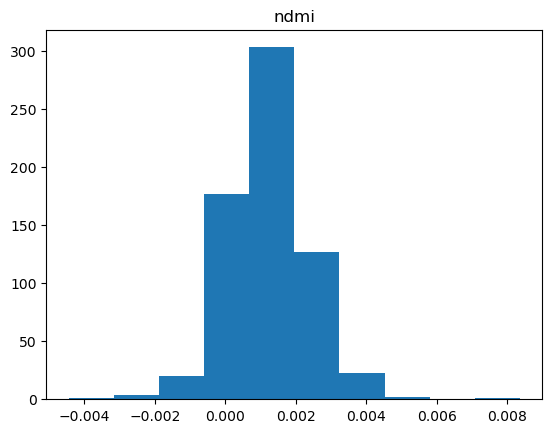

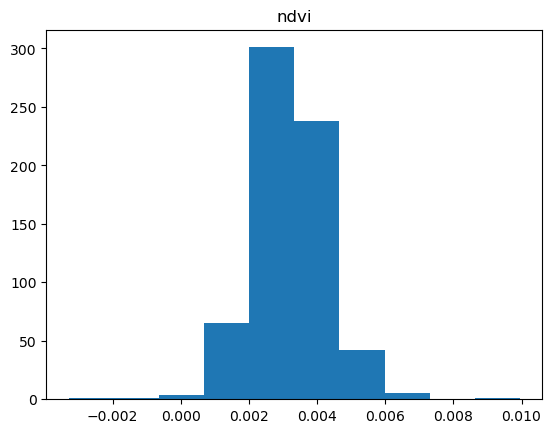

In [30]:
mk = np.array(mk_list)

data_types_dict = {'trend': str, 'h':bool, 'p':float, 'z':float, 'Tau':float, 's':float, 'var_s':float, 'slope': float, 'intercept':float, 'band':str, 'system_index':str}

mk_dict = {'trend': mk[:, 0], 
           'h':mk[:, 1], 
           'p':mk[:, 2], 'z':mk[:, 3], 'Tau':mk[:, 4], 's':mk[:, 5], 'var_s':mk[:, 6], 'slope': mk[:, 7], 'intercept':mk[:, 8], 'band':mk[:, 9], 'system_index':mk[:, 10]}

mk_df = pd.DataFrame(mk_dict).astype(data_types_dict)

groups = mk_df.groupby(['band']).groups
keys = groups.keys()
B1 = mk_df[groups['B1'][0]:groups['B1'][-1]]

def export_key_MK_tables(key, groups):
    frm_ind = groups[key][0]
    to_ind = groups[key][-1]
    key_df = mk_df[groups[key][0]:groups[key][-1]]
    key_df.to_excel(f'{path}mk_trends/mk_{str(key)}.xlsx')

[export_key_MK_tables(key, groups) for key in keys]

fignum=0

def hist(band):
    frm_ind = groups[band][0]
    to_ind = groups[band][-1]
    key_df = mk_df[frm_ind:to_ind]
    plt.figure()
    x = np.array(key_df.slope)
    print(f'{band}: min:{np.min(x)}, max:{np.max(x)}')
    plt.hist(x)
    plt.title(f'{band}')
    
    
[hist(key) for key in keys]


B1: min:6.727951529228449e-14, max:0.9527374072913992
B2: min:5.10702591327572e-14, max:0.9715358738879936
B3: min:8.815170815523743e-14, max:0.7669644911053035
B4: min:2.5140334258821895e-11, max:1.0
B5: min:2.6776358907909525e-12, max:1.0
B7: min:1.54181112321794e-11, max:1.0
BRIGHTNESS: min:1.509903313490213e-13, max:1.0
GREENNESS: min:1.9739765377835283e-13, max:0.9715358738879936
WETNESS: min:7.55773221783329e-12, max:1.0
evi: min:3.3595348725157237e-13, max:1.0
gndvi: min:3.885780586188048e-14, max:0.4418455025304515
nbr: min:1.6056045382129014e-12, max:1.0
ndbi: min:9.408473999883427e-12, max:0.9551233832161916
ndmi: min:9.408473999883427e-12, max:0.9551233832161916
ndvi: min:6.727951529228449e-14, max:0.8365263661204168


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

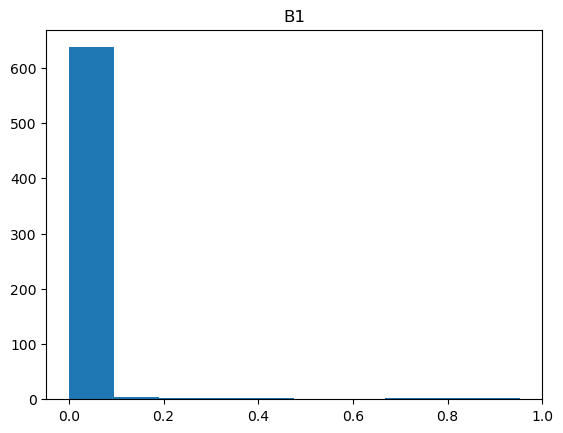

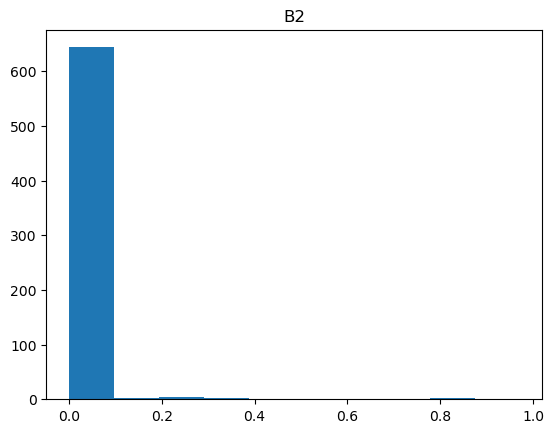

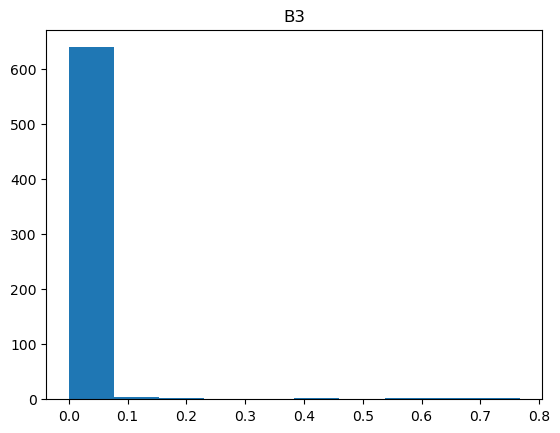

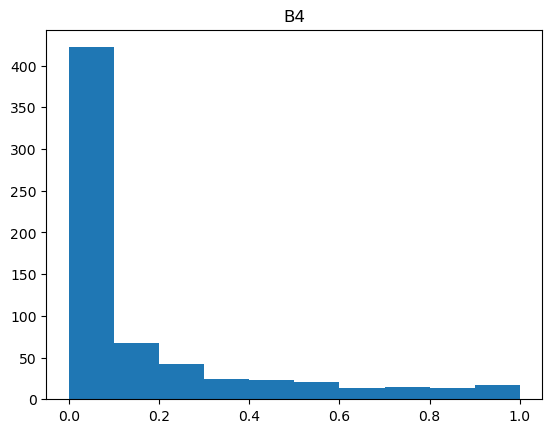

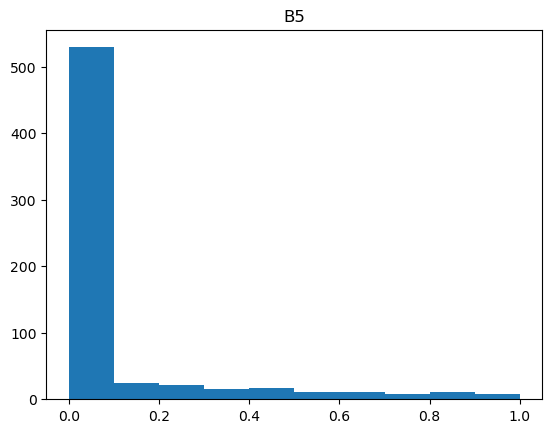

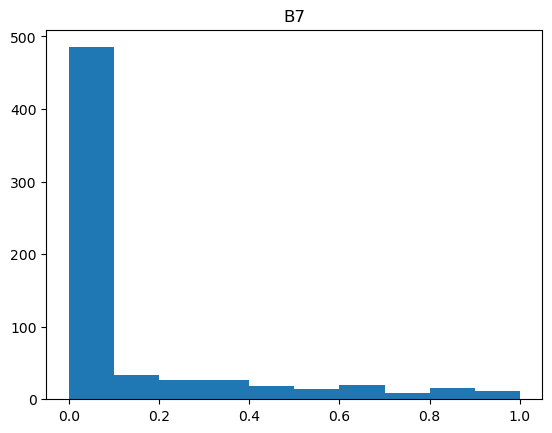

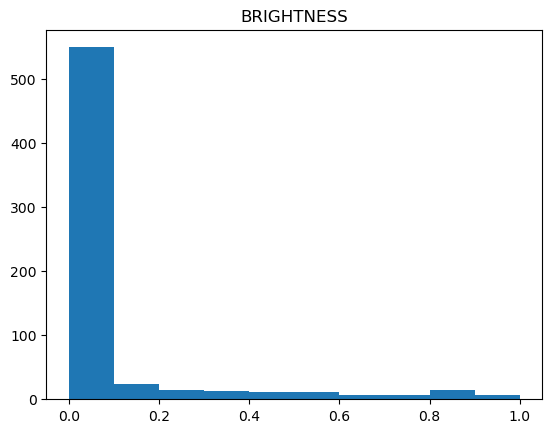

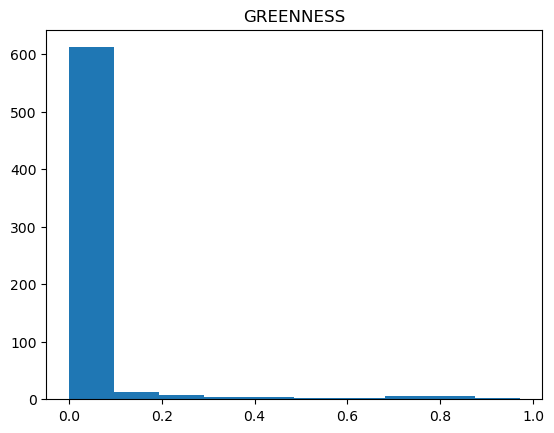

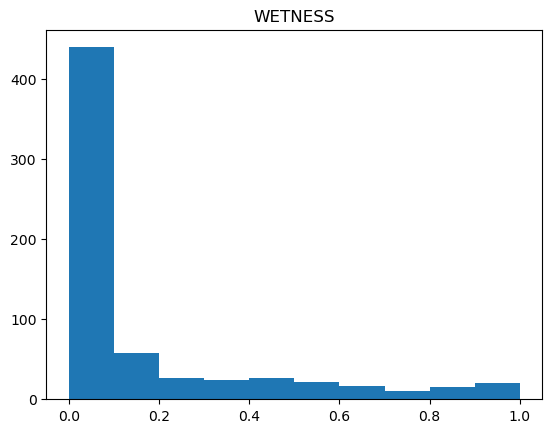

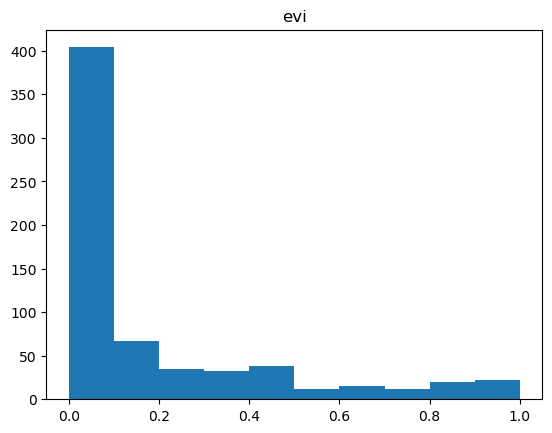

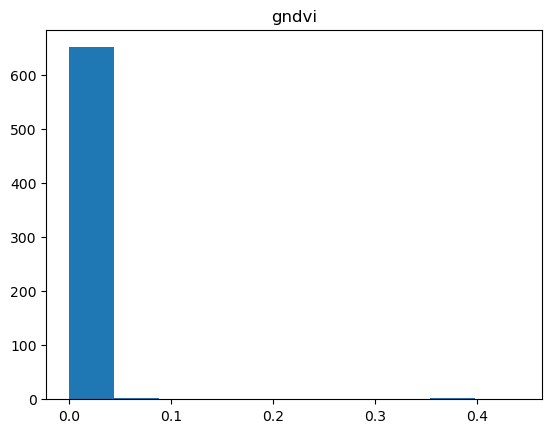

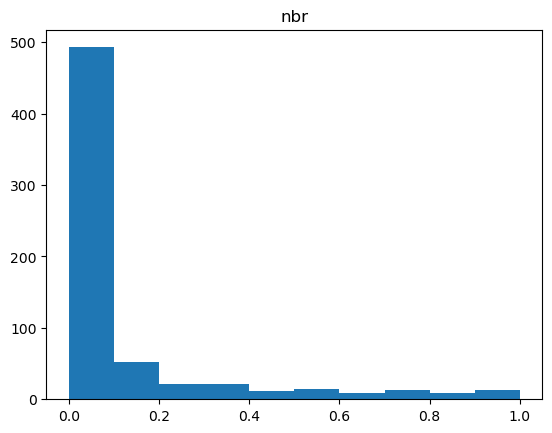

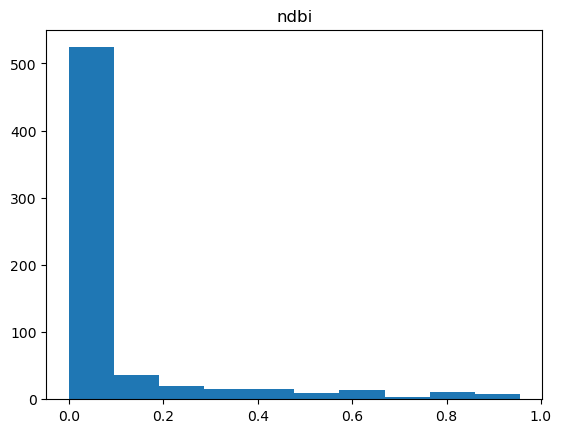

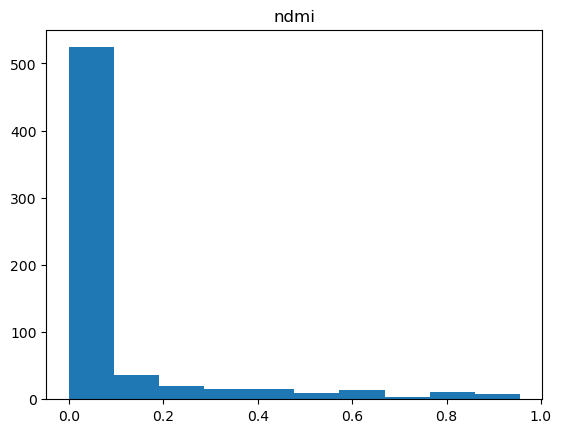

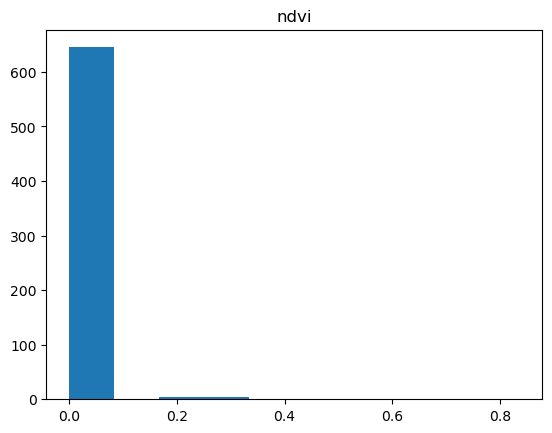

In [31]:
fignum=0

def hist(band):
    frm_ind = groups[band][0]
    to_ind = groups[band][-1]
    key_df = mk_df[frm_ind:to_ind]
    plt.figure()
    x = np.array(key_df.p)
    print(f'{band}: min:{np.min(x)}, max:{np.max(x)}')
    plt.hist(x)
    plt.title(f'{band}')
    
    
[hist(key) for key in keys]